# Importing Libraries

In [2]:
import os
import time
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm
import random
import glob

import cv2
from PIL import Image
from keras.layers import Input, Dense, BatchNormalization, Conv2D, Conv2DTranspose, ReLU, LeakyReLU, Flatten, MaxPooling2D, Dropout, Reshape

# Sample Images Abnormal

There are 1038 pictures of Abnormal.


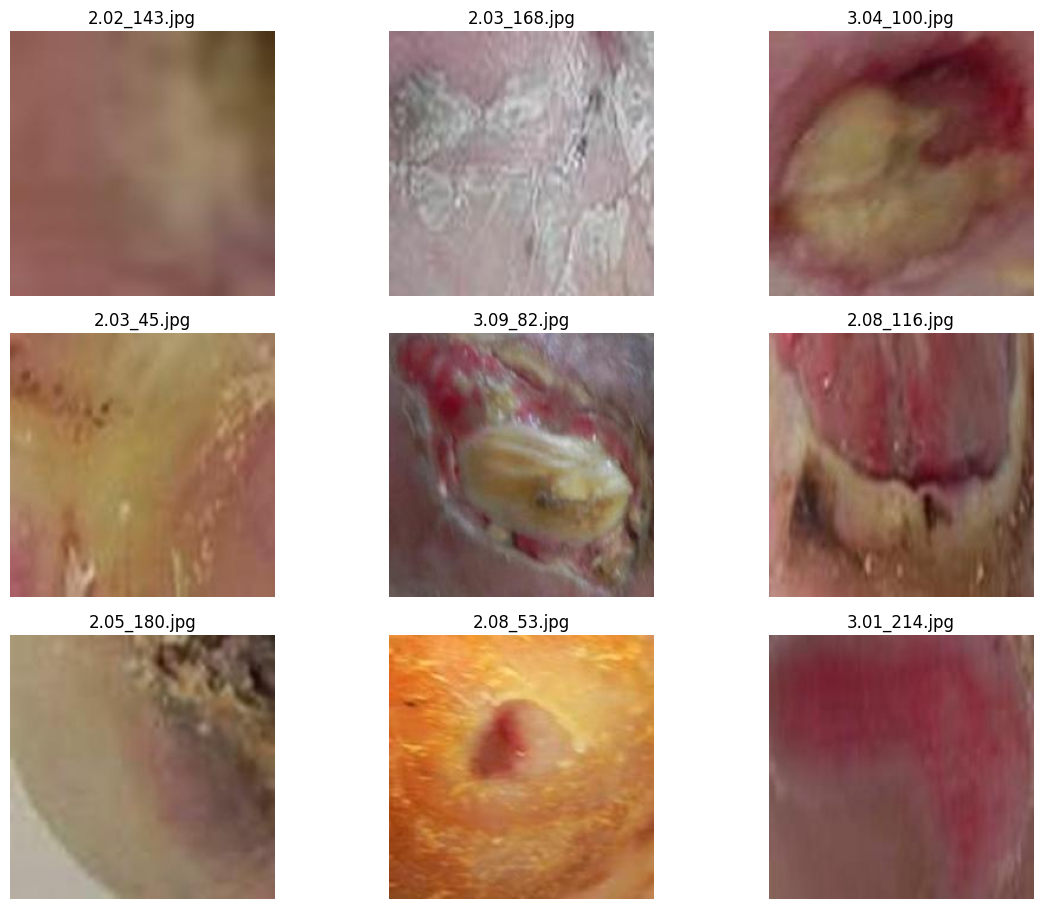

In [3]:
# Define the path to the dataset
PATH1 = '/kaggle/input/dfuc-parta-resized/Abnormal'

# List all images in the folder
images = os.listdir(PATH1)
print(f'There are {len(images)} pictures of Abnormal.')

# Create a grid of 3x3 images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for indx, axis in enumerate(axes.flatten()):
    # Randomly select an image
    rnd_indx = np.random.randint(0, len(images))
    img_path = os.path.join(PATH1, images[rnd_indx])  # Construct the correct file path
    img = plt.imread(img_path)  # Read the image
    imgplot = axis.imshow(img)  # Display the image
    axis.set_title(images[rnd_indx])  # Set the title to the image filename
    axis.set_axis_off()  # Turn off axis ticks and labels

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Sample images Normal

There are 641 pictures of Normal.


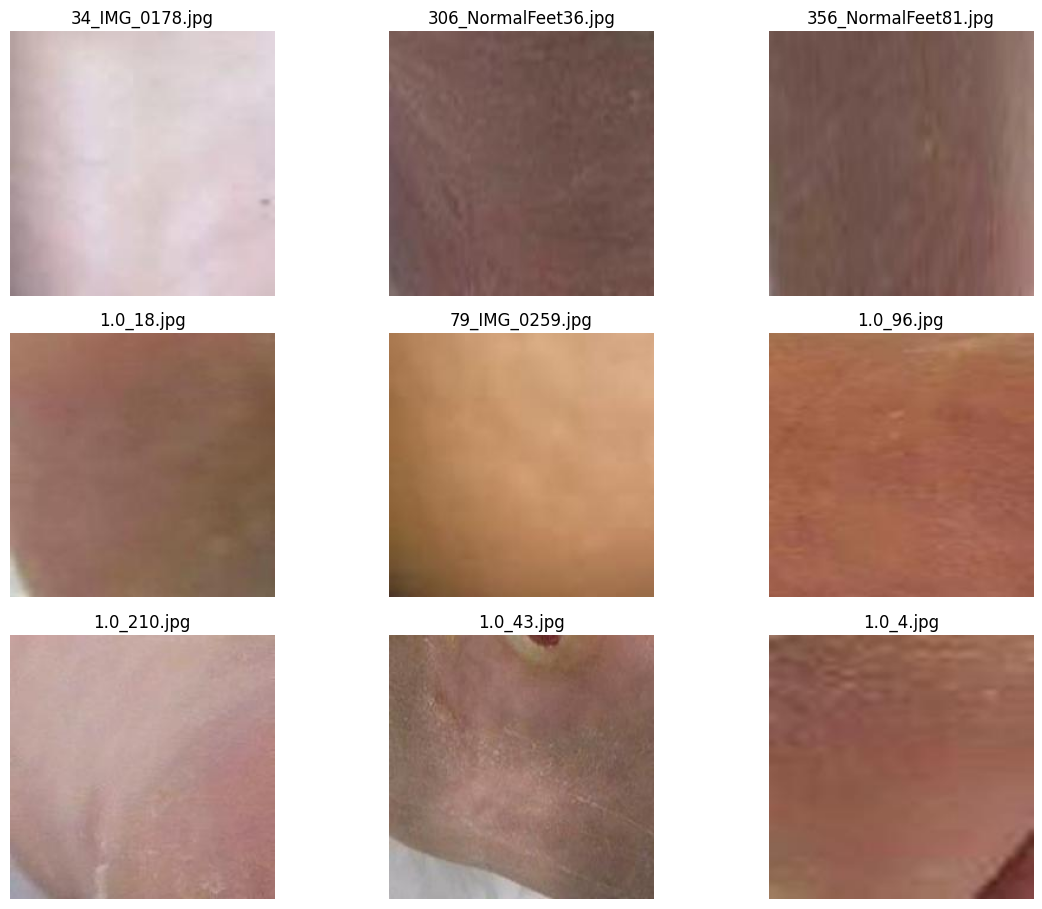

In [4]:
# Define the path to the dataset
PATH1 = '/kaggle/input/dfuc-parta-resized/Normal'

# List all images in the folder
images = os.listdir(PATH1)
print(f'There are {len(images)} pictures of Normal.')

# Create a grid of 3x3 images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for indx, axis in enumerate(axes.flatten()):
    # Randomly select an image
    rnd_indx = np.random.randint(0, len(images))
    img_path = os.path.join(PATH1, images[rnd_indx])  # Construct the correct file path
    img = plt.imread(img_path)  # Read the image
    imgplot = axis.imshow(img)  # Display the image
    axis.set_title(images[rnd_indx])  # Set the title to the image filename
    axis.set_axis_off()  # Turn off axis ticks and labels

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Runtime Configurations

In [5]:
TRAIN_PATH = '/kaggle/input/dfuc-parta-resized'

BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
NUM_CLASSES = 2
EPOCHS = 200

# Visualization of images from different folders

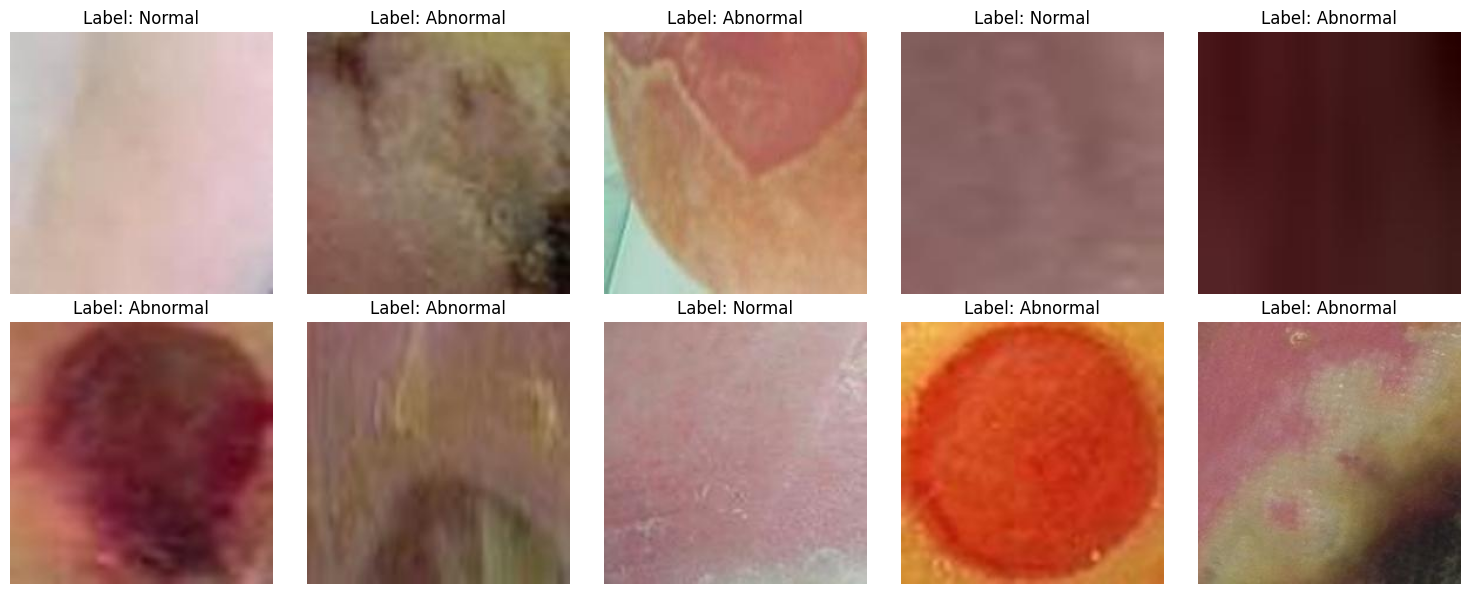

Class Names: ['Abnormal', 'Normal']
Index of 'Abnormal': 0
Index of 'Normal': 1


In [6]:
import os
import random
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image

# Path to your dataset (containing two subfolders: Normal/ and Abnormal/)
data_dir = "/kaggle/input/dfuc-parta-resized"  # Change to your dataset path

# Load dataset without any transform
train_data = ImageFolder(root=data_dir)

# Get class names (folder names)
class_names = train_data.classes

# Randomly select 10 image indices
indices = random.sample(range(len(train_data)), 10)

# Plot
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, idx in enumerate(indices):
    path, label = train_data.samples[idx]  # This gives image path and label
    img = Image.open(path).convert("RGB")  # Open and ensure 3 channels

    axes[i].imshow(img)
    axes[i].set_title(f"Label: {class_names[label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Print class name details
print("Class Names:", class_names)
print("Index of 'Abnormal':", class_names.index("Abnormal"))
print("Index of 'Normal':", class_names.index("Normal"))


# Visualizing Data Imbalance

Found 1679 files belonging to 2 classes.


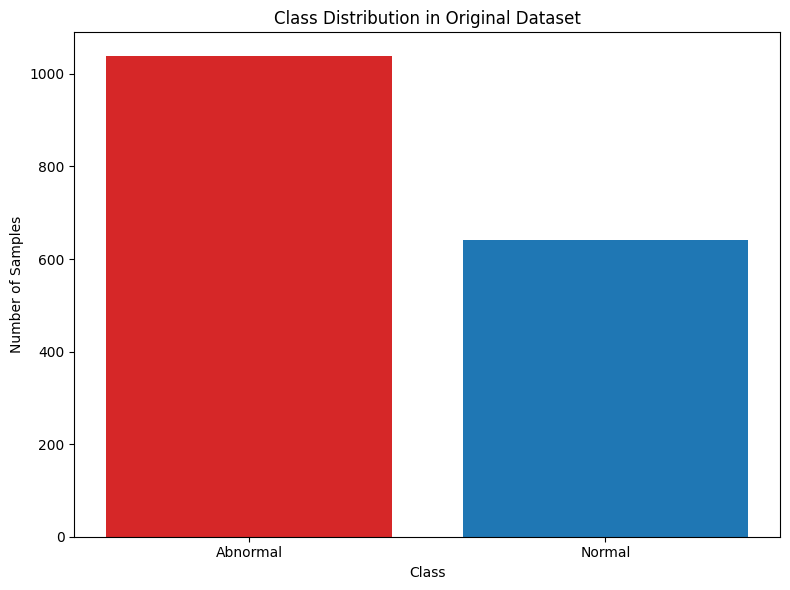

Abnormal (0): 1038 samples
Normal (1): 641 samples


In [7]:
# Import required libraries
import tensorflow as tf                  
import matplotlib.pyplot as plt         
import numpy as np                    

# Define the directory path to the dataset
TRAIN_PATH = '/kaggle/input/dfuc-parta-resized'

# Automatically infers labels from subfolder names
# Loads images in batches of 32, resizes them to specified dimensions
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    labels='inferred',                   # Labels are inferred from folder names
    batch_size=32,                       # Number of images per batch
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),  # Resize all images to this size
    seed=0                               # Seed for consistent shuffling
)

# Initialize an array to store class counts: index 0 for 'Abnormal', index 1 for 'Normal'
total_counts = np.array([0, 0])  # Format: [count of class 0, count of class 1]

# Loop through all batches in the dataset
for _, labels in full_ds:
    # Get unique class labels and their counts in this batch
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    
    # Add batch counts to the running total for each class
    for u, c in zip(unique, counts):
        total_counts[int(u)] += c

# Define class names (must match folder names or their inferred order)
class_names = ["Abnormal", "Normal"]

# Define bar colors for each class: red and blue
colors = ['#d62728', '#1f77b4']  # Red for Abnormal, Blue for Normal

# Create a bar plot to show number of samples per class
plt.figure(figsize=(8, 6))                   # Set figure size
plt.bar(class_names, total_counts, color=colors)  # Plot the class counts
plt.xlabel("Class")                         # X-axis label
plt.ylabel("Number of Samples")             # Y-axis label
plt.title("Class Distribution in Original Dataset")  # Plot title
plt.tight_layout()                          # Adjust layout to prevent clipping
plt.show()                                  # Display the plot

# Print the total count of images in each class
print(f"Abnormal (0): {total_counts[0]} samples")
print(f"Normal (1): {total_counts[1]} samples")

# **Classification**

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# **Data Loading**

In [9]:
# Define Constants
TRAIN_PATH = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

BATCH_SIZE = 32
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
NUM_CLASSES = 2
EPOCHS = 200

# Data Pre-processing

In [10]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define your dataset directory
data_dir = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"  # Replace with the actual path

# Define preprocessing transformations
preprocess_transforms = transforms.Compose([
    transforms.ToTensor(),                       # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5),         # Normalize to [-1, 1]
                         (0.5, 0.5, 0.5))
])

# Apply transforms using ImageFolder
preprocessed_dataset = datasets.ImageFolder(root=data_dir, transform=preprocess_transforms)

# Create a DataLoader to view and use the data
loader = DataLoader(preprocessed_dataset, batch_size=32, shuffle=True)

# View class names
class_names = preprocessed_dataset.classes
print(f"Classes: {class_names}")


Classes: ['Abnormal', 'Normal']


# Visualize 8 random images from a preprocessed PyTorch dataset

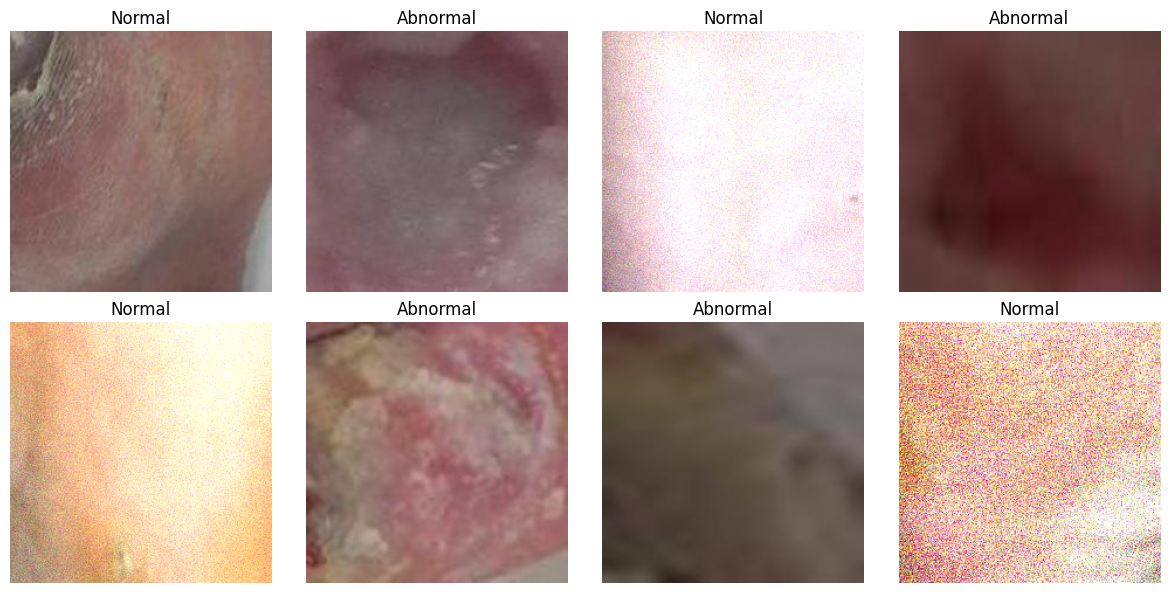

In [11]:
# Function to display a tensor image using matplotlib
def imshow(img_tensor, title):
    # Convert the image tensor to a NumPy array and rearrange dimensions from (C, H, W) to (H, W, C)
    img = img_tensor.numpy().transpose((1, 2, 0))

    # De-normalize the image values from [-1, 1] range back to [0, 1] for correct display
    img = img * 0.5 + 0.5

    # Display the image using matplotlib
    plt.imshow(img)

    # Set the title (e.g., class name) above the image
    plt.title(title)

    # Hide the axes for a cleaner image display
    plt.axis('off')


# Select 8 random indices from the dataset for visualization
random_indices = random.sample(range(len(preprocessed_dataset)), 8)


# Create a new figure with specified size (12x6 inches)
plt.figure(figsize=(12, 6))

# Loop through the selected indices to plot each image
for i, idx in enumerate(random_indices):
    # Get the image and its corresponding label from the dataset
    image, label = preprocessed_dataset[idx]

    # Create a subplot at the appropriate position in a 2-row, 4-column grid
    plt.subplot(2, 4, i + 1)

    # Display the image and its class label using the imshow() function
    imshow(image, class_names[label])

# Adjust spacing between subplots to prevent overlapping
plt.tight_layout()

# Show the final figure with all subplots
plt.show()


# **Data Cleaning**

In [12]:
import os
from collections import Counter

# Path to your dataset
dataset_path = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"

# Dictionary to hold extension counts per class
extension_counts = {}

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        extensions = []
        for file_name in os.listdir(class_path):
            if os.path.isfile(os.path.join(class_path, file_name)):
                ext = os.path.splitext(file_name)[-1].lower()
                extensions.append(ext)
        extension_counts[class_name] = Counter(extensions)

# Print the results
for class_name, counter in extension_counts.items():
    print(f"\nClass: {class_name}")
    for ext, count in counter.items():
        print(f"  {ext}: {count} files")



Class: Normal
  .png: 383 files
  .jpg: 641 files

Class: Abnormal
  .jpg: 1038 files


# BALANCING DATASET

Found 2062 files belonging to 2 classes.


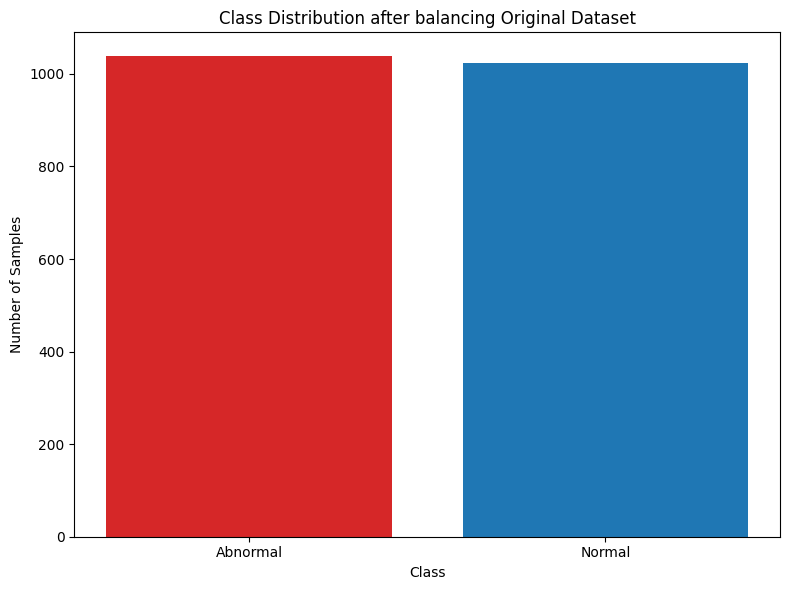

Abnormal (0): 1038 samples
Normal (1): 1024 samples


In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Define the directory path to the original dataset
TRAIN_PATH = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Load the entire dataset without splitting
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    labels='inferred',
    batch_size=32,  # Adjust based on your system's capability
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    seed=0
)

# Count the occurrences of each class (0: Abnormal, 1: Normal)
total_counts = np.array([0, 0])  # [Count of 0s, Count of 1s]

# Iterate through the dataset to count labels
for _, labels in full_ds:
    unique, counts = np.unique(labels.numpy(), return_counts=True)
    for u, c in zip(unique, counts):
        total_counts[int(u)] += c

# Define class names
class_names = ["Abnormal", "Normal"]

# Plot the class distribution
colors = ['#d62728', '#1f77b4']  # Red for Abnormal, Blue for Normal
plt.figure(figsize=(8, 6))
plt.bar(class_names, total_counts, color=colors)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution after balancing Original Dataset")
plt.tight_layout()
plt.show()


# Print class counts
print(f"Abnormal (0): {total_counts[0]} samples")
print(f"Normal (1): {total_counts[1]} samples")


# K fold Cross validation(k=2,3,4,5,7,10) with pretrained models

# EfficientNetB0

# k=5

In [15]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace if needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# Define the model
def build_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)

    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)  # sigmoid for binary

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 2: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Function to load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.keras.applications.efficientnet.preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        ds = ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
        return ds

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Step 3: Build model and apply early stopping
    model = build_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Optional: Evaluate on validation
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/200


I0000 00:00:1752477924.138079     108 service.cc:148] XLA service 0x7ce38c001f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752477924.139944     108 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752477924.139965     108 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752477926.125013     108 cuda_dnn.cc:529] Loaded cuDNN version 90300


 4/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5716 - auc: 0.6232 - loss: 0.7526 - precision: 0.6126 - recall: 0.5909

I0000 00:00:1752477936.495235     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


52/52 ━━━━━━━━━━━━━━━━━━━━ 55s 515ms/step - accuracy: 0.7593 - auc: 0.8443 - loss: 0.4974 - precision: 0.7430 - recall: 0.7916 - val_accuracy: 0.9467 - val_auc: 0.9875 - val_loss: 0.2989 - val_precision: 0.9256 - val_recall: 0.9707
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9063 - auc: 0.9706 - loss: 0.2182 - precision: 0.8871 - recall: 0.9287 - val_accuracy: 0.9540 - val_auc: 0.9908 - val_loss: 0.2275 - val_precision: 0.9471 - val_recall: 0.9610
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9313 - auc: 0.9775 - loss: 0.1867 - precision: 0.9086 - recall: 0.9566 - val_accuracy: 0.9588 - val_auc: 0.9927 - val_loss: 0.1818 - val_precision: 0.9476 - val_recall: 0.9707
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9372 - auc: 0.9829 - loss: 0.1652 - precision: 0.9245 - recall: 0.9510 - val_accuracy: 0.9685 - val_auc: 0.9920 - val_loss: 0.1536 - val_precision: 0.9528 - val_recall: 0.9854
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 

# k=2

In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace if needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# Define the model
def build_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)

    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)  # sigmoid for binary

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 2: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Function to load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.keras.applications.efficientnet.preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        ds = ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
        return ds

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Step 3: Build model and apply early stopping
    model = build_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Optional: Evaluate on validation
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 46s 677ms/step - accuracy: 0.6531 - auc: 0.6958 - loss: 0.7305 - precision: 0.6333 - recall: 0.7045 - val_accuracy: 0.8710 - val_auc: 0.9733 - val_loss: 0.3841 - val_precision: 0.9633 - val_recall: 0.7695
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9021 - auc: 0.9605 - loss: 0.2525 - precision: 0.8935 - recall: 0.9093 - val_accuracy: 0.9273 - val_auc: 0.9858 - val_loss: 0.2954 - val_precision: 0.9639 - val_recall: 0.8867
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9218 - auc: 0.9686 - loss: 0.2252 - precision: 0.9128 - recall: 0.9306 - val_accuracy: 0.9418 - val_auc: 0.9892 - val_loss: 0.2540 - val_precision: 0.9650 - val_recall: 0.9160
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9281 - auc: 0.9787 - loss: 0.1890 - precision: 0.9077 - recall: 0.9508 - val_accuracy: 0.9534 - val_auc: 0.9899 - val_loss: 0.2195 - val_precision: 0.9659 - val_recall: 0.9395


# k=3

In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace if needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# Define the model
def build_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)

    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)  # sigmoid for binary

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 2: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Function to load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.keras.applications.efficientnet.preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        ds = ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
        return ds

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Step 3: Build model and apply early stopping
    model = build_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Optional: Evaluate on validation
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 51s 612ms/step - accuracy: 0.6699 - auc: 0.7371 - loss: 0.6576 - precision: 0.6517 - recall: 0.6906 - val_accuracy: 0.9201 - val_auc: 0.9829 - val_loss: 0.3509 - val_precision: 0.9527 - val_recall: 0.8830
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8999 - auc: 0.9593 - loss: 0.2592 - precision: 0.8805 - recall: 0.9203 - val_accuracy: 0.9477 - val_auc: 0.9894 - val_loss: 0.2690 - val_precision: 0.9474 - val_recall: 0.9474
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9230 - auc: 0.9740 - loss: 0.2064 - precision: 0.8974 - recall: 0.9512 - val_accuracy: 0.9564 - val_auc: 0.9909 - val_loss: 0.2233 - val_precision: 0.9588 - val_recall: 0.9532
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9247 - auc: 0.9794 - loss: 0.1864 - precision: 0.9048 - recall: 0.9452 - val_accuracy: 0.9622 - val_auc: 0.9923 - val_loss: 0.1868 - val_precision: 0.9620 - val_recall: 0.9620


# k=4

In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace if needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# Define the model
def build_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)

    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)  # sigmoid for binary

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 2: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Function to load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.keras.applications.efficientnet.preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        ds = ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
        return ds

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Step 3: Build model and apply early stopping
    model = build_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Optional: Evaluate on validation
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 496ms/step - accuracy: 0.7425 - auc: 0.8112 - loss: 0.5562 - precision: 0.7382 - recall: 0.7575 - val_accuracy: 0.9419 - val_auc: 0.9846 - val_loss: 0.3033 - val_precision: 0.9065 - val_recall: 0.9844
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9250 - auc: 0.9734 - loss: 0.2079 - precision: 0.9137 - recall: 0.9377 - val_accuracy: 0.9612 - val_auc: 0.9886 - val_loss: 0.2318 - val_precision: 0.9338 - val_recall: 0.9922
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9388 - auc: 0.9799 - loss: 0.1815 - precision: 0.9277 - recall: 0.9501 - val_accuracy: 0.9612 - val_auc: 0.9897 - val_loss: 0.1901 - val_precision: 0.9338 - val_recall: 0.9922
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9423 - auc: 0.9822 - loss: 0.1620 - precision: 0.9340 - recall: 0.9513 - val_accuracy: 0.9612 - val_auc: 0.9909 - val_loss: 0.1603 - val_precision: 0.9338 - val_recall: 0.9922


# k=7

In [6]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace if needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# Define the model
def build_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)

    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)  # sigmoid for binary

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 2: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Function to load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.keras.applications.efficientnet.preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        ds = ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
        return ds

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Step 3: Build model and apply early stopping
    model = build_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Optional: Evaluate on validation
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 365ms/step - accuracy: 0.7626 - auc: 0.8355 - loss: 0.4975 - precision: 0.7478 - recall: 0.7839 - val_accuracy: 0.9492 - val_auc: 0.9895 - val_loss: 0.2895 - val_precision: 0.9342 - val_recall: 0.9660
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9204 - auc: 0.9738 - loss: 0.2050 - precision: 0.9040 - recall: 0.9375 - val_accuracy: 0.9695 - val_auc: 0.9932 - val_loss: 0.2128 - val_precision: 0.9600 - val_recall: 0.9796
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9238 - auc: 0.9798 - loss: 0.1825 - precision: 0.9072 - recall: 0.9407 - val_accuracy: 0.9661 - val_auc: 0.9933 - val_loss: 0.1665 - val_precision: 0.9536 - val_recall: 0.9796
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9368 - auc: 0.9854 - loss: 0.1500 - precision: 0.9235 - recall: 0.9499 - val_accuracy: 0.9695 - val_auc: 0.9946 - val_loss: 0.1399 - val_precision: 0.9662 - val_recall: 0.9728


# k=10

In [8]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace if needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# Define the model
def build_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)

    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)  # sigmoid for binary

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 2: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Function to load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.keras.applications.efficientnet.preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        ds = ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
        return ds

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Step 3: Build model and apply early stopping
    model = build_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Optional: Evaluate on validation
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


========== Fold 1 ==========
Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 351ms/step - accuracy: 0.7940 - auc: 0.8714 - loss: 0.4431 - precision: 0.7671 - recall: 0.8388 - val_accuracy: 0.9565 - val_auc: 0.9902 - val_loss: 0.2598 - val_precision: 0.9519 - val_recall: 0.9612
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9306 - auc: 0.9784 - loss: 0.1878 - precision: 0.9134 - recall: 0.9484 - val_accuracy: 0.9517 - val_auc: 0.9937 - val_loss: 0.1940 - val_precision: 0.9604 - val_recall: 0.9417
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9366 - auc: 0.9819 - loss: 0.1715 - precision: 0.9239 - recall: 0.9488 - val_accuracy: 0.9517 - val_auc: 0.9951 - val_loss: 0.1538 - val_precision: 0.9604 - val_recall: 0.9417
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9388 - auc: 0.9852 - loss: 0.1517 - precision: 0.9293 - recall: 0.9474 - val_accuracy: 0.9662 - val_auc: 0.9956 - val_loss: 0.1268 - val_precision: 0.9615 - val_recall: 0.9709


# DenseNet121

# k=2

In [14]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace if needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# Step 2: Define DenseNet121 model
def build_densenet121_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base model

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)  # Binary classification

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        ds = ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
        return ds

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Step 4: Build model and apply early stopping
    model = build_densenet121_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Evaluate on validation set
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6214 - auc: 0.6845 - loss: 0.6157 - precision: 0.6407 - recall: 0.5276 - val_accuracy: 0.4966 - val_auc: 0.8969 - val_loss: 0.7897 - val_precision: 0.4966 - val_recall: 1.0000
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.7811 - auc: 0.8636 - loss: 0.4558 - precision: 0.8034 - recall: 0.7364 - val_accuracy: 0.4966 - val_auc: 0.9082 - val_loss: 0.7993 - val_precision: 0.4966 - val_recall: 1.0000
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.7983 - auc: 0.8769 - loss: 0.4321 - precision: 0.7978 - recall: 0.7913 - val_accuracy: 0.4976 - val_auc: 0.9196 - val_loss: 0.7671 - val_precision: 0.4971 - val_recall: 1.0000
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.8183 - auc: 0.8933 - loss: 0.4082 - precision: 0.8138 - recall: 0.8193 - val_accuracy: 0.5024 - val_auc: 0.9261 - val_loss: 0.7120 - val_precision: 0.4995 - val_recall: 1.0000


# k=3

In [16]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace with your path

# Step 1: Prepare filepaths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

# Step 2: Define DenseNet model
def build_densenet_model(IMAGE_HEIGHT=224, IMAGE_WIDTH=224, NUM_CLASSES=1):
    inputs = layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

    x = layers.Lambda(preprocess_input)(inputs)

    base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base model

    x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4, name="top_dropout")(x)
    outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)

    model = tf.keras.Model(inputs, outputs, name="DenseNet121_Binary")

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_densenet_model()

    # Early stopping callback
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Evaluate
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
Epoch 1/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 57s 694ms/step - accuracy: 0.6634 - auc: 0.7423 - loss: 0.5669 - precision: 0.6784 - recall: 0.5874 - val_accuracy: 0.5000 - val_auc: 0.9187 - val_loss: 0.7583 - val_precision: 0.4985 - val_recall: 1.0000
Epoch 2/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.7671 - auc: 0.8676 - loss: 0.4414 - precision: 0.7582 - recall: 0.7684 - val_accuracy: 0.5029 - val_auc: 0.9314 - val_loss: 0.7261 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.8016 - auc: 0.8930 - loss: 0.4065 - precision: 0.7798 - recall: 0.8275 - val_accuracy: 0.5392 - val_auc: 0.9377 - val_loss: 0.6568 - val_precision: 0.5190 - val_recall: 1.0000
Epoch 4/200
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8022 - auc: 0.8999 - loss: 0.3969 - precision: 0.7737 - recall: 0.8404 - val_accuracy: 0.6163 - val_auc: 0.9420 - val_loss: 0.5810 - val_precision: 0.5644 - val_recall: 1.00

# k=4

In [17]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace with your path

# Step 1: Prepare filepaths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

# Step 2: Define DenseNet model
def build_densenet_model(IMAGE_HEIGHT=224, IMAGE_WIDTH=224, NUM_CLASSES=1):
    inputs = layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

    x = layers.Lambda(preprocess_input)(inputs)

    base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base model

    x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4, name="top_dropout")(x)
    outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)

    model = tf.keras.Model(inputs, outputs, name="DenseNet121_Binary")

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_densenet_model()

    # Early stopping callback
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Evaluate
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 66s 798ms/step - accuracy: 0.6904 - auc: 0.7758 - loss: 0.5479 - precision: 0.7039 - recall: 0.6532 - val_accuracy: 0.7171 - val_auc: 0.9353 - val_loss: 0.5878 - val_precision: 0.6375 - val_recall: 0.9961
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.7928 - auc: 0.8859 - loss: 0.4171 - precision: 0.7925 - recall: 0.7923 - val_accuracy: 0.6531 - val_auc: 0.9441 - val_loss: 0.5680 - val_precision: 0.5889 - val_recall: 0.9961
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.8223 - auc: 0.9062 - loss: 0.3881 - precision: 0.8101 - recall: 0.8407 - val_accuracy: 0.6938 - val_auc: 0.9487 - val_loss: 0.5381 - val_precision: 0.6189 - val_recall: 0.9961
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8214 - auc: 0.9153 - loss: 0.3669 - precision: 0.8070 - recall: 0.8428 - val_accuracy: 0.7810 - val_auc: 0.9532 - val_loss: 0.4959 - val_precision: 0.6959 - val_recall: 0.99

# k=5

In [18]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace with your path

# Step 1: Prepare filepaths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

# Step 2: Define DenseNet model
def build_densenet_model(IMAGE_HEIGHT=224, IMAGE_WIDTH=224, NUM_CLASSES=1):
    inputs = layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

    x = layers.Lambda(preprocess_input)(inputs)

    base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base model

    x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4, name="top_dropout")(x)
    outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)

    model = tf.keras.Model(inputs, outputs, name="DenseNet121_Binary")

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_densenet_model()

    # Early stopping callback
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Evaluate
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 70s 829ms/step - accuracy: 0.6118 - auc: 0.6498 - loss: 0.6945 - precision: 0.6112 - recall: 0.6447 - val_accuracy: 0.5278 - val_auc: 0.9188 - val_loss: 0.6534 - val_precision: 0.5125 - val_recall: 1.0000
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.7823 - auc: 0.8784 - loss: 0.4306 - precision: 0.7678 - recall: 0.8044 - val_accuracy: 0.5811 - val_auc: 0.9357 - val_loss: 0.6153 - val_precision: 0.5423 - val_recall: 1.0000
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8225 - auc: 0.8993 - loss: 0.4000 - precision: 0.8130 - recall: 0.8327 - val_accuracy: 0.6344 - val_auc: 0.9467 - val_loss: 0.5700 - val_precision: 0.5758 - val_recall: 1.0000
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8211 - auc: 0.9039 - loss: 0.3874 - precision: 0.7979 - recall: 0.8552 - val_accuracy: 0.7046 - val_auc: 0.9534 - val_loss: 0.5194 - val_precision: 0.6277 - val_recall: 0.99

# k=7

In [19]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace with your path

# Step 1: Prepare filepaths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

# Step 2: Define DenseNet model
def build_densenet_model(IMAGE_HEIGHT=224, IMAGE_WIDTH=224, NUM_CLASSES=1):
    inputs = layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

    x = layers.Lambda(preprocess_input)(inputs)

    base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base model

    x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4, name="top_dropout")(x)
    outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)

    model = tf.keras.Model(inputs, outputs, name="DenseNet121_Binary")

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_densenet_model()

    # Early stopping callback
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Evaluate
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)



========== Fold 1 ==========
Epoch 1/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 57s 540ms/step - accuracy: 0.7133 - auc: 0.8038 - loss: 0.5330 - precision: 0.7183 - recall: 0.6875 - val_accuracy: 0.4983 - val_auc: 0.9271 - val_loss: 0.7241 - val_precision: 0.4983 - val_recall: 1.0000
Epoch 2/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.7867 - auc: 0.8828 - loss: 0.4208 - precision: 0.7680 - recall: 0.8104 - val_accuracy: 0.5424 - val_auc: 0.9386 - val_loss: 0.6471 - val_precision: 0.5213 - val_recall: 1.0000
Epoch 3/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8135 - auc: 0.8965 - loss: 0.4013 - precision: 0.7909 - recall: 0.8422 - val_accuracy: 0.6203 - val_auc: 0.9447 - val_loss: 0.5656 - val_precision: 0.5676 - val_recall: 1.0000
Epoch 4/200
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.8253 - auc: 0.9142 - loss: 0.3703 - precision: 0.8020 - recall: 0.8564 - val_accuracy: 0.6949 - val_auc: 0.9502 - val_loss: 0.5006 - val_precision: 0.6213 - val_recall: 0.9932


# k=10

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace with your path

# Step 1: Prepare filepaths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle

# Step 2: Define DenseNet model
def build_densenet_model(IMAGE_HEIGHT=224, IMAGE_WIDTH=224, NUM_CLASSES=1):
    inputs = layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

    x = layers.Lambda(preprocess_input)(inputs)

    base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base model

    x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4, name="top_dropout")(x)
    outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)

    model = tf.keras.Model(inputs, outputs, name="DenseNet121_Binary")

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Load dataset from DataFrame
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_densenet_model()

    # Early stopping callback
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    # Evaluate
    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


========== Fold 1 ==========
Epoch 1/200


I0000 00:00:1752511465.946555      97 service.cc:148] XLA service 0x7b0268004c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752511465.947636      97 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752511465.947660      97 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752511468.743366      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/58 ━━━━━━━━━━━━━━━━━━━━ 31:59 34s/step - accuracy: 0.5625 - auc: 0.5647 - loss: 0.7497 - precision: 0.6154 - recall: 0.4706

I0000 00:00:1752511480.239319      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


58/58 ━━━━━━━━━━━━━━━━━━━━ 74s 699ms/step - accuracy: 0.7006 - auc: 0.7693 - loss: 0.5579 - precision: 0.7147 - recall: 0.6471 - val_accuracy: 0.5024 - val_auc: 0.9233 - val_loss: 0.6793 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.7904 - auc: 0.8869 - loss: 0.4156 - precision: 0.7854 - recall: 0.7882 - val_accuracy: 0.5266 - val_auc: 0.9327 - val_loss: 0.6478 - val_precision: 0.5124 - val_recall: 1.0000
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.8132 - auc: 0.9022 - loss: 0.3884 - precision: 0.7954 - recall: 0.8348 - val_accuracy: 0.5942 - val_auc: 0.9400 - val_loss: 0.5738 - val_precision: 0.5514 - val_recall: 0.9903
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.8309 - auc: 0.9157 - loss: 0.3679 - precision: 0.8125 - recall: 0.8526 - val_accuracy: 0.6715 - val_auc: 0.9447 - val_loss: 0.5133 - val_precision: 0.6036 - val_recall: 0.9903
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 

# Resnet101

# k=2

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define ResNet101 model
def build_resnet101_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = ResNet101(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_resnet101_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=3

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define ResNet101 model
def build_resnet101_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = ResNet101(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_resnet101_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=4

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define ResNet101 model
def build_resnet101_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = ResNet101(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_resnet101_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=5

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define ResNet101 model
def build_resnet101_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = ResNet101(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_resnet101_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=7

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define ResNet101 model
def build_resnet101_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = ResNet101(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_resnet101_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=10

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define ResNet101 model
def build_resnet101_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = ResNet101(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_resnet101_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# InceptionV3

# k=2

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)  # Initial size (will be resized to 299x299)
RESIZE_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Load file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define InceptionV3 model
def build_inceptionv3_model(input_height=224, input_width=224, num_classes=1):
    inputs = layers.Input(shape=(input_height, input_width, 3))
    
    # Resize input to 299x299 as required by InceptionV3
    x = layers.Resizing(299, 299)(inputs)
    x = layers.Lambda(preprocess_input)(x)

    base_model = InceptionV3(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(tf.image.resize(img, RESIZE_SIZE))  # Resize to 299x299 + preprocess
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_inceptionv3_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=3

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)  # Initial size (will be resized to 299x299)
RESIZE_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Load file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define InceptionV3 model
def build_inceptionv3_model(input_height=224, input_width=224, num_classes=1):
    inputs = layers.Input(shape=(input_height, input_width, 3))
    
    # Resize input to 299x299 as required by InceptionV3
    x = layers.Resizing(299, 299)(inputs)
    x = layers.Lambda(preprocess_input)(x)

    base_model = InceptionV3(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(tf.image.resize(img, RESIZE_SIZE))  # Resize to 299x299 + preprocess
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_inceptionv3_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=4

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)  # Initial size (will be resized to 299x299)
RESIZE_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Load file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define InceptionV3 model
def build_inceptionv3_model(input_height=224, input_width=224, num_classes=1):
    inputs = layers.Input(shape=(input_height, input_width, 3))
    
    # Resize input to 299x299 as required by InceptionV3
    x = layers.Resizing(299, 299)(inputs)
    x = layers.Lambda(preprocess_input)(x)

    base_model = InceptionV3(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(tf.image.resize(img, RESIZE_SIZE))  # Resize to 299x299 + preprocess
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_inceptionv3_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=5

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)  # Initial size (will be resized to 299x299)
RESIZE_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Load file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define InceptionV3 model
def build_inceptionv3_model(input_height=224, input_width=224, num_classes=1):
    inputs = layers.Input(shape=(input_height, input_width, 3))
    
    # Resize input to 299x299 as required by InceptionV3
    x = layers.Resizing(299, 299)(inputs)
    x = layers.Lambda(preprocess_input)(x)

    base_model = InceptionV3(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(tf.image.resize(img, RESIZE_SIZE))  # Resize to 299x299 + preprocess
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_inceptionv3_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=7

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)  # Initial size (will be resized to 299x299)
RESIZE_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Load file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define InceptionV3 model
def build_inceptionv3_model(input_height=224, input_width=224, num_classes=1):
    inputs = layers.Input(shape=(input_height, input_width, 3))
    
    # Resize input to 299x299 as required by InceptionV3
    x = layers.Resizing(299, 299)(inputs)
    x = layers.Lambda(preprocess_input)(x)

    base_model = InceptionV3(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(tf.image.resize(img, RESIZE_SIZE))  # Resize to 299x299 + preprocess
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_inceptionv3_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=10

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)  # Initial size (will be resized to 299x299)
RESIZE_SIZE = (299, 299)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'

# Step 1: Load file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define InceptionV3 model
def build_inceptionv3_model(input_height=224, input_width=224, num_classes=1):
    inputs = layers.Input(shape=(input_height, input_width, 3))
    
    # Resize input to 299x299 as required by InceptionV3
    x = layers.Resizing(299, 299)(inputs)
    x = layers.Lambda(preprocess_input)(x)

    base_model = InceptionV3(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(tf.image.resize(img, RESIZE_SIZE))  # Resize to 299x299 + preprocess
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_inceptionv3_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# VGG16

# k=2

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace as needed

# Step 1: Load image file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define VGG16 model
def build_vgg16_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = VGG16(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_vgg16_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# K=3

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace as needed

# Step 1: Load image file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define VGG16 model
def build_vgg16_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = VGG16(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_vgg16_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=4

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace as needed

# Step 1: Load image file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define VGG16 model
def build_vgg16_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = VGG16(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_vgg16_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=5

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace as needed

# Step 1: Load image file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define VGG16 model
def build_vgg16_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = VGG16(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_vgg16_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=7

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace as needed

# Step 1: Load image file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define VGG16 model
def build_vgg16_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = VGG16(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_vgg16_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)

# k=10

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Replace as needed

# Step 1: Load image file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define VGG16 model
def build_vgg16_model(image_height=224, image_width=224, num_classes=1):
    inputs = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Lambda(preprocess_input)(inputs)

    base_model = VGG16(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: K-Fold training loop
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = preprocess_input(img)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_vgg16_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# Alexnet

# k=2

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define AlexNet model
def build_alexnet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='sigmoid')  # Binary classification
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_alexnet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=3

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define AlexNet model
def build_alexnet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='sigmoid')  # Binary classification
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_alexnet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=4

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define AlexNet model
def build_alexnet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='sigmoid')  # Binary classification
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_alexnet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=5

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define AlexNet model
def build_alexnet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='sigmoid')  # Binary classification
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_alexnet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=7

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define AlexNet model
def build_alexnet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='sigmoid')  # Binary classification
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_alexnet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=10

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define AlexNet model
def build_alexnet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='sigmoid')  # Binary classification
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_alexnet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# LeNet

# k=2

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update this path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define LeNet model
def build_lenet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(6, kernel_size=5, activation='relu', padding='same'),
        layers.AveragePooling2D(),

        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.AveragePooling2D(),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')  # Binary output
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_lenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=3

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update this path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define LeNet model
def build_lenet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(6, kernel_size=5, activation='relu', padding='same'),
        layers.AveragePooling2D(),

        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.AveragePooling2D(),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')  # Binary output
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_lenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=4

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update this path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define LeNet model
def build_lenet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(6, kernel_size=5, activation='relu', padding='same'),
        layers.AveragePooling2D(),

        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.AveragePooling2D(),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')  # Binary output
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_lenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=5

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update this path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define LeNet model
def build_lenet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(6, kernel_size=5, activation='relu', padding='same'),
        layers.AveragePooling2D(),

        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.AveragePooling2D(),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')  # Binary output
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_lenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=7

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update this path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define LeNet model
def build_lenet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(6, kernel_size=5, activation='relu', padding='same'),
        layers.AveragePooling2D(),

        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.AveragePooling2D(),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')  # Binary output
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_lenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=10

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Update this path if needed

# Step 1: Create dataframe with image paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define LeNet model
def build_lenet_model(image_height=224, image_width=224, num_classes=1):
    model = models.Sequential([
        layers.Input(shape=(image_height, image_width, 3)),

        layers.Conv2D(6, kernel_size=5, activation='relu', padding='same'),
        layers.AveragePooling2D(),

        layers.Conv2D(16, kernel_size=5, activation='relu'),
        layers.AveragePooling2D(),

        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(num_classes, activation='sigmoid')  # Binary output
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# Step 3: Apply Stratified K-Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            img = tf.cast(img, tf.float32) / 255.0
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    model = build_lenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# GoogleNet

# k=2

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Adjust as needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define GoogLeNet model
def inception_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    path1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(path4)
    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def build_googlenet_model(image_height=224, image_width=224, num_classes=1):
    input_layer = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2D(64, (1, 1), activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs=input_layer, outputs=output, name="GoogLeNet_Binary")

    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )

    return model

# Step 3: Apply Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Data pipeline
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_googlenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)

# k=3

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Adjust as needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define GoogLeNet model
def inception_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    path1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(path4)
    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def build_googlenet_model(image_height=224, image_width=224, num_classes=1):
    input_layer = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2D(64, (1, 1), activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs=input_layer, outputs=output, name="GoogLeNet_Binary")

    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )

    return model

# Step 3: Apply Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Data pipeline
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_googlenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=4

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Adjust as needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define GoogLeNet model
def inception_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    path1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(path4)
    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def build_googlenet_model(image_height=224, image_width=224, num_classes=1):
    input_layer = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2D(64, (1, 1), activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs=input_layer, outputs=output, name="GoogLeNet_Binary")

    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )

    return model

# Step 3: Apply Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Data pipeline
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_googlenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=5

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Adjust as needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define GoogLeNet model
def inception_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    path1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(path4)
    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def build_googlenet_model(image_height=224, image_width=224, num_classes=1):
    input_layer = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2D(64, (1, 1), activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs=input_layer, outputs=output, name="GoogLeNet_Binary")

    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )

    return model

# Step 3: Apply Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Data pipeline
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_googlenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=7

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Adjust as needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define GoogLeNet model
def inception_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    path1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(path4)
    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def build_googlenet_model(image_height=224, image_width=224, num_classes=1):
    input_layer = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2D(64, (1, 1), activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs=input_layer, outputs=output, name="GoogLeNet_Binary")

    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )

    return model

# Step 3: Apply Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Data pipeline
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_googlenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# k=10

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 200
NUM_CLASSES = 1
DATA_DIR = '/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN'  # Adjust as needed

# Step 1: Create dataframe with file paths and labels
image_paths = []
labels = []
for label, subdir in enumerate(sorted(os.listdir(DATA_DIR))):
    folder_path = os.path.join(DATA_DIR, subdir)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(folder_path, fname))
            labels.append(label)

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Define GoogLeNet model
def inception_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    path1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
    path2 = layers.Conv2D(f3_out, (3, 3), padding='same', activation='relu')(path2)
    path3 = layers.Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
    path3 = layers.Conv2D(f5_out, (5, 5), padding='same', activation='relu')(path3)
    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(path4)
    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def build_googlenet_model(image_height=224, image_width=224, num_classes=1):
    input_layer = layers.Input(shape=(image_height, image_width, 3))
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Conv2D(64, (1, 1), activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    output = layers.Dense(num_classes, activation='sigmoid')(x)

    model = models.Model(inputs=input_layer, outputs=output, name="GoogLeNet_Binary")

    model.compile(
        optimizer=optimizers.Adam(1e-3),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            "accuracy",
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )

    return model

# Step 3: Apply Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(df['filepath'], df['label'])):
    print(f"\n========== Fold {fold+1} ==========")

    train_files = df.iloc[train_idx]
    val_files = df.iloc[val_idx]

    # Data pipeline
    def load_dataset(file_df):
        paths = file_df['filepath'].values
        labels = file_df['label'].values
        ds = tf.data.Dataset.from_tensor_slices((paths, labels))

        def process(path, label):
            img = tf.io.read_file(path)
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, IMAGE_SIZE)
            return img, tf.cast(label, tf.float32)

        return ds.map(process).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    train_ds = load_dataset(train_files)
    val_ds = load_dataset(val_files)

    # Build model
    model = build_googlenet_model()

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Train
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stop],
        verbose=1
    )

    print("\nValidation Metrics:")
    model.evaluate(val_ds, verbose=1)


# K-fold Cross validation for Proposed Model

# K=5 fold

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics

# Self-Attention Layer
class SelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim                      # Total embedding dimension
        self.num_heads = num_heads                      # Number of attention heads
        self.head_dim = embed_dim // num_heads          # Dimension per attention head
        
        # Ensure embedding dimension is divisible by number of heads
        assert self.head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"
        
        # Dense layers to project inputs into queries, keys, and values
        self.query_dense = layers.Dense(embed_dim)  
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        
        # Dense layer to combine multiple attention heads output
        self.combine_heads = layers.Dense(embed_dim)
        
    def attention(self, query, key, value):
        # Calculate scaled dot-product attention scores
        score = tf.matmul(query, key, transpose_b=True)   # Compute dot product of query and key^T
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32) # Dimensionality for scaling
        scaled_score = score / tf.math.sqrt(dim_key)      # Scale scores to stabilize gradients
        weights = tf.nn.softmax(scaled_score, axis=-1)    # Apply softmax to get attention weights
        output = tf.matmul(weights, value)                 # Weighted sum of values based on attention weights
        return output, weights
    
    def separate_heads(self, x, batch_size):
        # Reshape the input tensor to split into multiple attention heads
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.head_dim)) 
        # Transpose to shape: (batch_size, num_heads, sequence_length, head_dim)
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        
        # Flatten spatial dimensions (height and width) into one sequence dimension
        input_shape = tf.shape(inputs)
        height, width = input_shape[1], input_shape[2]
        x = tf.reshape(inputs, (batch_size, height * width, input_shape[3]))  # shape: (batch, seq_len, channels)
        
        # Create queries, keys, and values projections
        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)
        
        # Separate each into multiple heads
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        
        # Compute attention output and weights
        attention_output, attention_weights = self.attention(query, key, value)
        
        # Transpose back to (batch_size, seq_len, embed_dim)
        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        
        # Concatenate attention heads
        concat_attention = tf.reshape(attention_output, (batch_size, height * width, self.embed_dim))
        
        # Final dense layer to combine heads into output
        output = self.combine_heads(concat_attention)
        
        # Reshape output back to spatial format (batch_size, height, width, embed_dim)
        output = tf.reshape(output, (batch_size, height, width, self.embed_dim))
        
        return output

# Spatial Attention Block
#SpatialAttentionBlock is designed to perform spatial attention—that is, it learns where in the image the model should "pay more attention" by assigning weights to each spatial location
class SpatialAttentionBlock(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(SpatialAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        # 1x1 convolutions for query, key, and value feature generation
        self.conv1 = layers.Conv2D(filters, 1, activation='relu')
        self.conv2 = layers.Conv2D(filters, 1, activation='relu')
        self.conv3 = layers.Conv2D(filters, 1, activation='relu')
        self.conv_out = layers.Conv2D(filters, 1)  # Final convolution after attention
        self.softmax = layers.Softmax(axis=-1)    # Softmax for attention weights
        
    def call(self, inputs):
        # Get dynamic shapes for batch size, height, width, channels
        batch_size, height, width, channels = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]
        
        # Generate query, key, and value feature maps from input
        query = self.conv1(inputs)
        key = self.conv2(inputs)
        value = self.conv3(inputs)
        
        # Reshape to (batch_size, sequence_length, filters) for matrix multiplication
        query = tf.reshape(query, (batch_size, height * width, self.filters))
        key = tf.reshape(key, (batch_size, height * width, self.filters))
        value = tf.reshape(value, (batch_size, height * width, self.filters))
        
        # Compute attention scores by dot product of query and key transpose
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = attention_scores / tf.math.sqrt(tf.cast(self.filters, tf.float32))  # Scale scores
        
        # Softmax to obtain attention weights
        attention_weights = self.softmax(attention_scores)
        
        # Weighted sum of values based on attention weights
        attended_features = tf.matmul(attention_weights, value)
        
        # Reshape attended features back to spatial format
        attended_features = tf.reshape(attended_features, (batch_size, height, width, self.filters))
        
        # Final convolution to refine features
        output = self.conv_out(attended_features)
        
        # Add residual connection if input channels match filter count
        if inputs.shape[-1] == self.filters:
            output = output + inputs
        
        return output

# Channel Attention Block
#In Channel Attention, the model learns to weigh the importance of each channel in a feature map.
class ChannelAttentionBlock(layers.Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio
        
        # Global average and max pooling layers
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        
        # Dense layers to learn channel-wise attention weights
        self.dense1 = layers.Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')
        
    def call(self, inputs):
        # Average pooling branch: captures average channel information
        avg_pool = self.global_avg_pool(inputs)                     # Shape: (batch_size, channels)
        avg_pool = tf.expand_dims(tf.expand_dims(avg_pool, 1), 1)   # Reshape to (batch_size, 1, 1, channels)
        avg_pool = self.dense1(avg_pool)                             # Reduce dimension and non-linearity
        avg_pool = self.dense2(avg_pool)                             # Channel attention weights via sigmoid
        
        # Max pooling branch: captures prominent channel features
        max_pool = self.global_max_pool(inputs)
        max_pool = tf.expand_dims(tf.expand_dims(max_pool, 1), 1)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)
        
        # Combine attention weights from both branches
        attention = avg_pool + max_pool
        
        # Multiply input features by attention weights (channel-wise scaling)
        return inputs * attention

# ResNet-like Block with Attention
class ResidualAttentionBlock(layers.Layer):
    def __init__(self, filters, use_attention=True, **kwargs):
        super(ResidualAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.use_attention = use_attention
        
        # Two convolutional layers with batch normalization
        self.conv1 = layers.Conv2D(filters, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.bn2 = layers.BatchNormalization()
        
        # Attention blocks (spatial and channel) if enabled
        if use_attention:
            self.spatial_attention = SpatialAttentionBlock(filters)
            self.channel_attention = ChannelAttentionBlock(filters)
        
        self.relu = layers.ReLU()
        
    def call(self, inputs):
        # First conv layer with activation and batch norm
        x = self.conv1(inputs)
        x = self.bn1(x)
        
        # Second conv layer with batch norm (no activation yet)
        x = self.conv2(x)
        x = self.bn2(x)
        
        # Apply attention blocks if enabled
        if self.use_attention:
            x = self.spatial_attention(x)
            x = self.channel_attention(x)
        
        # Residual skip connection if input and output have same channel dimension
        if inputs.shape[-1] == self.filters:
            x = x + inputs
        
        # Final activation after residual addition
        return self.relu(x)

# CNN Model with Self-Attention
def build_cnn_attention_model(IMAGE_WIDTH=224, IMAGE_HEIGHT=224, NUM_CLASSES=2):
    
    inputs = layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))  # Input layer with image shape
    
    # Normalize pixel values to [0,1]
    x = layers.Rescaling(1./255)(inputs)
    
    # Initial convolutional layer with large kernel and stride for downsampling
    x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Stage 1: Basic convolutions with batch norm
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    # Stage 2: Residual blocks with attention + downsampling
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    
    # Stage 3: Increased filter count and residual attention blocks + downsampling
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    
    # Stage 4: High-level features + self-attention + downsampling
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Apply self-attention over feature map
    x = SelfAttention(embed_dim=512, num_heads=8)(x)
    
    # Additional residual attention blocks after self-attention
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    
    # Global average pooling to reduce spatial dimensions
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    
    # Dropout for regularization to prevent overfitting
    x = layers.Dropout(0.5)(x)
    
    # Dense layer with ReLU activation for learning complex features
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    # Output layer:
    # For binary classification, use sigmoid activation and binary crossentropy loss
    # For multi-class, use softmax activation and sparse categorical crossentropy
    if NUM_CLASSES == 2:
        outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)
        loss_fn = losses.BinaryCrossentropy()
    else:
        outputs = layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')(x)
        loss_fn = losses.SparseCategoricalCrossentropy()
    
    # Create the Keras model instance
    model = Model(inputs, outputs, name="CNN_SelfAttention")
    
    # Compile model with Adam optimizer, selected loss, and common classification metrics
    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=[
            'accuracy',                            # Classification accuracy
            metrics.Precision(name='precision'), # Precision metric
            metrics.Recall(name='recall'),       # Recall metric
            metrics.AUC(name='auc')               # Area under ROC curve
        ]
    )

    return model


# Usage example
if __name__ == "__main__":
    # Image and dataset settings
    IMAGE_WIDTH = 224
    IMAGE_HEIGHT = 224
    NUM_CLASSES = 2
    BATCH_SIZE = 32
    EPOCHS = 200
    K = 5
    SEED = 42
    DATA_DIR = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"

    # Gather image file paths and labels
    image_paths = []
    labels = []

    for class_index, class_name in enumerate(sorted(os.listdir(DATA_DIR))):
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                image_paths.append(os.path.join(class_dir, fname))
                labels.append(class_index)

    image_paths = np.array(image_paths)
    labels = np.array(labels)

    # Apply Stratified K-Fold split
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

    fold = 1
    for train_idx, val_idx in skf.split(image_paths, labels):
        print(f"\n========== Fold {fold} ==========")

        train_files = image_paths[train_idx]
        train_labels = labels[train_idx]
        val_files = image_paths[val_idx]
        val_labels = labels[val_idx]

        def preprocess(file_path, label):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
            return image / 255.0, label

        train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_labels))
        train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
        val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        # Build and compile model for this fold
        model = build_cnn_attention_model(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CLASSES)

        early_stop = EarlyStopping(
        monitor='val_loss',        # You can also try 'val_accuracy' or 'val_auc'
        patience=10,               # Number of epochs to wait without improvement
        restore_best_weights=True # Revert to best model after training
        )
   
        # Fit model
        model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=EPOCHS,
            callbacks=[early_stop],
            verbose=1
        )

        fold += 1


========== Fold 1 ==========
Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.7270 - auc: 0.8039 - loss: 0.5873 - precision: 0.6052 - recall: 0.7230 - val_accuracy: 0.4964 - val_auc: 0.5000 - val_loss: 0.8818 - val_precision: 0.4964 - val_recall: 1.0000
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 646ms/step - accuracy: 0.7365 - auc: 0.8529 - loss: 0.5760 - precision: 0.6450 - recall: 0.8099 - val_accuracy: 0.4964 - val_auc: 0.5000 - val_loss: 1.2307 - val_precision: 0.4964 - val_recall: 1.0000
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 599ms/step - accuracy: 0.7759 - auc: 0.8843 - loss: 0.5506 - precision: 0.6812 - recall: 0.8296 - val_accuracy: 0.4964 - val_auc: 0.5000 - val_loss: 1.6588 - val_precision: 0.4964 - val_recall: 1.0000
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 613ms/step - accuracy: 0.7988 - auc: 0.9016 - loss: 0.5028 - precision: 0.7071 - recall: 0.8648 - val_accuracy: 0.4964 - val_auc: 0.5000 - val_loss: 2.0760 - val_precision: 0.4964 - val_recall: 1.0

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for i, (train_idx, val_idx) in enumerate(skf.split(image_paths, labels), 1):
    # Prepare validation dataset as before
    val_files = image_paths[val_idx]
    val_labels = labels[val_idx]

    val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
    val_ds = val_ds.map(preprocess).batch(BATCH_SIZE)

    # Predict probabilities for validation set
    y_true = []
    y_pred = []
    for images, labels_batch in val_ds:
        preds = model.predict(images)
        y_pred.extend(preds.flatten())
        y_true.extend(labels_batch.numpy())

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title('ROC Curve Across Folds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# K=2

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics

# Self-Attention Layer
class SelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim                      # Total embedding dimension
        self.num_heads = num_heads                      # Number of attention heads
        self.head_dim = embed_dim // num_heads          # Dimension per attention head
        
        # Ensure embedding dimension is divisible by number of heads
        assert self.head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"
        
        # Dense layers to project inputs into queries, keys, and values
        self.query_dense = layers.Dense(embed_dim)  
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        
        # Dense layer to combine multiple attention heads output
        self.combine_heads = layers.Dense(embed_dim)
        
    def attention(self, query, key, value):
        # Calculate scaled dot-product attention scores
        score = tf.matmul(query, key, transpose_b=True)   # Compute dot product of query and key^T
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32) # Dimensionality for scaling
        scaled_score = score / tf.math.sqrt(dim_key)      # Scale scores to stabilize gradients
        weights = tf.nn.softmax(scaled_score, axis=-1)    # Apply softmax to get attention weights
        output = tf.matmul(weights, value)                 # Weighted sum of values based on attention weights
        return output, weights
    
    def separate_heads(self, x, batch_size):
        # Reshape the input tensor to split into multiple attention heads
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.head_dim)) 
        # Transpose to shape: (batch_size, num_heads, sequence_length, head_dim)
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        
        # Flatten spatial dimensions (height and width) into one sequence dimension
        input_shape = tf.shape(inputs)
        height, width = input_shape[1], input_shape[2]
        x = tf.reshape(inputs, (batch_size, height * width, input_shape[3]))  # shape: (batch, seq_len, channels)
        
        # Create queries, keys, and values projections
        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)
        
        # Separate each into multiple heads
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        
        # Compute attention output and weights
        attention_output, attention_weights = self.attention(query, key, value)
        
        # Transpose back to (batch_size, seq_len, embed_dim)
        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        
        # Concatenate attention heads
        concat_attention = tf.reshape(attention_output, (batch_size, height * width, self.embed_dim))
        
        # Final dense layer to combine heads into output
        output = self.combine_heads(concat_attention)
        
        # Reshape output back to spatial format (batch_size, height, width, embed_dim)
        output = tf.reshape(output, (batch_size, height, width, self.embed_dim))
        
        return output

# Spatial Attention Block
#SpatialAttentionBlock is designed to perform spatial attention—that is, it learns where in the image the model should "pay more attention" by assigning weights to each spatial location
class SpatialAttentionBlock(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(SpatialAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        # 1x1 convolutions for query, key, and value feature generation
        self.conv1 = layers.Conv2D(filters, 1, activation='relu')
        self.conv2 = layers.Conv2D(filters, 1, activation='relu')
        self.conv3 = layers.Conv2D(filters, 1, activation='relu')
        self.conv_out = layers.Conv2D(filters, 1)  # Final convolution after attention
        self.softmax = layers.Softmax(axis=-1)    # Softmax for attention weights
        
    def call(self, inputs):
        # Get dynamic shapes for batch size, height, width, channels
        batch_size, height, width, channels = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]
        
        # Generate query, key, and value feature maps from input
        query = self.conv1(inputs)
        key = self.conv2(inputs)
        value = self.conv3(inputs)
        
        # Reshape to (batch_size, sequence_length, filters) for matrix multiplication
        query = tf.reshape(query, (batch_size, height * width, self.filters))
        key = tf.reshape(key, (batch_size, height * width, self.filters))
        value = tf.reshape(value, (batch_size, height * width, self.filters))
        
        # Compute attention scores by dot product of query and key transpose
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = attention_scores / tf.math.sqrt(tf.cast(self.filters, tf.float32))  # Scale scores
        
        # Softmax to obtain attention weights
        attention_weights = self.softmax(attention_scores)
        
        # Weighted sum of values based on attention weights
        attended_features = tf.matmul(attention_weights, value)
        
        # Reshape attended features back to spatial format
        attended_features = tf.reshape(attended_features, (batch_size, height, width, self.filters))
        
        # Final convolution to refine features
        output = self.conv_out(attended_features)
        
        # Add residual connection if input channels match filter count
        if inputs.shape[-1] == self.filters:
            output = output + inputs
        
        return output

# Channel Attention Block
#In Channel Attention, the model learns to weigh the importance of each channel in a feature map.
class ChannelAttentionBlock(layers.Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio
        
        # Global average and max pooling layers
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        
        # Dense layers to learn channel-wise attention weights
        self.dense1 = layers.Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')
        
    def call(self, inputs):
        # Average pooling branch: captures average channel information
        avg_pool = self.global_avg_pool(inputs)                     # Shape: (batch_size, channels)
        avg_pool = tf.expand_dims(tf.expand_dims(avg_pool, 1), 1)   # Reshape to (batch_size, 1, 1, channels)
        avg_pool = self.dense1(avg_pool)                             # Reduce dimension and non-linearity
        avg_pool = self.dense2(avg_pool)                             # Channel attention weights via sigmoid
        
        # Max pooling branch: captures prominent channel features
        max_pool = self.global_max_pool(inputs)
        max_pool = tf.expand_dims(tf.expand_dims(max_pool, 1), 1)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)
        
        # Combine attention weights from both branches
        attention = avg_pool + max_pool
        
        # Multiply input features by attention weights (channel-wise scaling)
        return inputs * attention

# ResNet-like Block with Attention
class ResidualAttentionBlock(layers.Layer):
    def __init__(self, filters, use_attention=True, **kwargs):
        super(ResidualAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.use_attention = use_attention
        
        # Two convolutional layers with batch normalization
        self.conv1 = layers.Conv2D(filters, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.bn2 = layers.BatchNormalization()
        
        # Attention blocks (spatial and channel) if enabled
        if use_attention:
            self.spatial_attention = SpatialAttentionBlock(filters)
            self.channel_attention = ChannelAttentionBlock(filters)
        
        self.relu = layers.ReLU()
        
    def call(self, inputs):
        # First conv layer with activation and batch norm
        x = self.conv1(inputs)
        x = self.bn1(x)
        
        # Second conv layer with batch norm (no activation yet)
        x = self.conv2(x)
        x = self.bn2(x)
        
        # Apply attention blocks if enabled
        if self.use_attention:
            x = self.spatial_attention(x)
            x = self.channel_attention(x)
        
        # Residual skip connection if input and output have same channel dimension
        if inputs.shape[-1] == self.filters:
            x = x + inputs
        
        # Final activation after residual addition
        return self.relu(x)

# CNN Model with Self-Attention
def build_cnn_attention_model(IMAGE_WIDTH=224, IMAGE_HEIGHT=224, NUM_CLASSES=2):
  
    
    inputs = layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))  # Input layer with image shape
    
    # Normalize pixel values to [0,1]
    x = layers.Rescaling(1./255)(inputs)
    
    # Initial convolutional layer with large kernel and stride for downsampling
    x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Stage 1: Basic convolutions with batch norm
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    # Stage 2: Residual blocks with attention + downsampling
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    
    # Stage 3: Increased filter count and residual attention blocks + downsampling
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    
    # Stage 4: High-level features + self-attention + downsampling
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Apply self-attention over feature map
    x = SelfAttention(embed_dim=512, num_heads=8)(x)
    
    # Additional residual attention blocks after self-attention
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    
    # Global average pooling to reduce spatial dimensions
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    
    # Dropout for regularization to prevent overfitting
    x = layers.Dropout(0.5)(x)
    
    # Dense layer with ReLU activation for learning complex features
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    # Output layer:
    # For binary classification, use sigmoid activation and binary crossentropy loss
    # For multi-class, use softmax activation and sparse categorical crossentropy
    if NUM_CLASSES == 2:
        outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)
        loss_fn = losses.BinaryCrossentropy()
    else:
        outputs = layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')(x)
        loss_fn = losses.SparseCategoricalCrossentropy()
    
    # Create the Keras model instance
    model = Model(inputs, outputs, name="CNN_SelfAttention")
    
    # Compile model with Adam optimizer, selected loss, and common classification metrics
    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=[
            'accuracy',                            # Classification accuracy
            metrics.Precision(name='precision'), # Precision metric
            metrics.Recall(name='recall'),       # Recall metric
            metrics.AUC(name='auc')               # Area under ROC curve
        ]
    )

    return model


# Usage example
if __name__ == "__main__":
    # Image and dataset settings
    IMAGE_WIDTH = 224
    IMAGE_HEIGHT = 224
    NUM_CLASSES = 2
    BATCH_SIZE = 32
    EPOCHS = 200
    K = 2
    SEED = 42
    DATA_DIR = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"

    # Gather image file paths and labels
    image_paths = []
    labels = []

    for class_index, class_name in enumerate(sorted(os.listdir(DATA_DIR))):
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                image_paths.append(os.path.join(class_dir, fname))
                labels.append(class_index)

    image_paths = np.array(image_paths)
    labels = np.array(labels)

    # Apply Stratified K-Fold split
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

    fold = 1
    for train_idx, val_idx in skf.split(image_paths, labels):
        print(f"\n========== Fold {fold} ==========")

        train_files = image_paths[train_idx]
        train_labels = labels[train_idx]
        val_files = image_paths[val_idx]
        val_labels = labels[val_idx]

        def preprocess(file_path, label):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
            return image / 255.0, label

        train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_labels))
        train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
        val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        # Build and compile model for this fold
        model = build_cnn_attention_model(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CLASSES)

        early_stop = EarlyStopping(
        monitor='val_loss',        # You can also try 'val_accuracy' or 'val_auc'
        patience=10,               # Number of epochs to wait without improvement
        restore_best_weights=True # Revert to best model after training
        )
   
        # Fit model
        model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=EPOCHS,
            callbacks=[early_stop],
            verbose=1
        )

        fold += 1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
import numpy as np
import os

# ----------- Self-Attention Layer -----------
class SelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        assert self.head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"

        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.head_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        height, width = tf.shape(inputs)[1], tf.shape(inputs)[2]
        x = tf.reshape(inputs, (batch_size, height * width, inputs.shape[-1]))

        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)

        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)

        attention_output, _ = self.attention(query, key, value)

        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention_output, (batch_size, height * width, self.embed_dim))
        output = self.combine_heads(concat_attention)
        output = tf.reshape(output, (batch_size, height, width, self.embed_dim))
        return output

# ----------- Spatial Attention Block -----------
class SpatialAttentionBlock(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(SpatialAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.conv1 = layers.Conv2D(filters, 1, activation='relu')
        self.conv2 = layers.Conv2D(filters, 1, activation='relu')
        self.conv3 = layers.Conv2D(filters, 1, activation='relu')
        self.conv_out = layers.Conv2D(filters, 1)
        self.softmax = layers.Softmax(axis=-1)

    def call(self, inputs):
        batch_size, height, width, _ = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]

        query = self.conv1(inputs)
        key = self.conv2(inputs)
        value = self.conv3(inputs)

        query = tf.reshape(query, (batch_size, height * width, self.filters))
        key = tf.reshape(key, (batch_size, height * width, self.filters))
        value = tf.reshape(value, (batch_size, height * width, self.filters))

        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores /= tf.math.sqrt(tf.cast(self.filters, tf.float32))
        attention_weights = self.softmax(attention_scores)
        attended_features = tf.matmul(attention_weights, value)

        attended_features = tf.reshape(attended_features, (batch_size, height, width, self.filters))
        output = self.conv_out(attended_features)

        if inputs.shape[-1] == self.filters:
            output += inputs
        return output

# ----------- Channel Attention Block -----------
class ChannelAttentionBlock(layers.Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        self.dense1 = layers.Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')

    def call(self, inputs):
        avg_pool = self.global_avg_pool(inputs)
        avg_pool = tf.expand_dims(tf.expand_dims(avg_pool, 1), 1)
        avg_pool = self.dense1(avg_pool)
        avg_pool = self.dense2(avg_pool)

        max_pool = self.global_max_pool(inputs)
        max_pool = tf.expand_dims(tf.expand_dims(max_pool, 1), 1)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)

        attention = avg_pool + max_pool
        return inputs * attention

# ----------- Residual Attention Block -----------
class ResidualAttentionBlock(layers.Layer):
    def __init__(self, filters, use_attention=True, **kwargs):
        super(ResidualAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.use_attention = use_attention
        self.conv1 = layers.Conv2D(filters, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.bn2 = layers.BatchNormalization()

        if use_attention:
            self.spatial_attention = SpatialAttentionBlock(filters)
            self.channel_attention = ChannelAttentionBlock(filters)

        self.relu = layers.ReLU()

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.conv2(x)
        x = self.bn2(x)

        if self.use_attention:
            x = self.spatial_attention(x)
            x = self.channel_attention(x)

        if inputs.shape[-1] == self.filters:
            x = x + inputs

        return self.relu(x)

# ----------- Model Definition -----------
def build_cnn_attention_model(IMAGE_WIDTH=224, IMAGE_HEIGHT=224, NUM_CLASSES=2):
    inputs = layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))
    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)

    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)

    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)

    x = SelfAttention(embed_dim=512, num_heads=8)(x)

    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = ResidualAttentionBlock(512, use_attention=True)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    if NUM_CLASSES == 2:
        outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)
        loss_fn = losses.BinaryCrossentropy()
    else:
        outputs = layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')(x)
        loss_fn = losses.SparseCategoricalCrossentropy()

    model = Model(inputs, outputs, name="CNN_SelfAttention")

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss=loss_fn,
        metrics=[
            'accuracy',
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc')
        ]
    )
    return model

# ----------- K-Fold Training Function -----------
def run_kfold_attention_model(image_paths, labels, K=2, seed=42, epochs=200, batch_size=32, num_classes=2):
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=seed)

    results_per_fold = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "auc": []
    }

    fold = 1
    for train_idx, val_idx in skf.split(image_paths, labels):
        print(f"\n========== Fold {fold} ==========")

        train_files = image_paths[train_idx]
        train_labels = labels[train_idx]
        val_files = image_paths[val_idx]
        val_labels = labels[val_idx]

        def preprocess(file_path, label):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (224, 224))
            return image / 255.0, tf.cast(label, tf.float32)

        train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_labels))
        train_ds = train_ds.map(preprocess).shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
        val_ds = val_ds.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = build_cnn_attention_model(224, 224, num_classes)

        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=epochs,
            callbacks=[early_stop],
            verbose=1
        )

        print(f"Evaluating Fold {fold}...")
        metrics_dict = model.evaluate(val_ds, verbose=0, return_dict=True)
        print(metrics_dict)

        results_per_fold["accuracy"].append(metrics_dict.get("accuracy"))
        results_per_fold["precision"].append(metrics_dict.get("precision"))
        results_per_fold["recall"].append(metrics_dict.get("recall"))
        results_per_fold["auc"].append(metrics_dict.get("auc"))

        fold += 1

    return results_per_fold

# ----------- Main Execution -----------
if __name__ == "__main__":
    DATA_DIR = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"

    image_paths = []
    labels = []

    for class_index, class_name in enumerate(sorted(os.listdir(DATA_DIR))):
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                image_paths.append(os.path.join(class_dir, fname))
                labels.append(class_index)

    image_paths = np.array(image_paths)
    labels = np.array(labels)

    results = run_kfold_attention_model(image_paths, labels, K=2, epochs=200, batch_size=32, num_classes=2)

    print("\nFold-wise results:")
    for metric_name, values in results.items():
        print(f"{metric_name}: {values}")


In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for i, (train_idx, val_idx) in enumerate(skf.split(image_paths, labels), 1):
    # Prepare validation dataset as before
    val_files = image_paths[val_idx]
    val_labels = labels[val_idx]

    val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
    val_ds = val_ds.map(preprocess).batch(BATCH_SIZE)

    # Predict probabilities for validation set
    y_true = []
    y_pred = []
    for images, labels_batch in val_ds:
        preds = model.predict(images)
        y_pred.extend(preds.flatten())
        y_true.extend(labels_batch.numpy())

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title('ROC Curve Across Folds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# k=3

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics

# Self-Attention Layer
class SelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim                      # Total embedding dimension
        self.num_heads = num_heads                      # Number of attention heads
        self.head_dim = embed_dim // num_heads          # Dimension per attention head
        
        # Ensure embedding dimension is divisible by number of heads
        assert self.head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"
        
        # Dense layers to project inputs into queries, keys, and values
        self.query_dense = layers.Dense(embed_dim)  
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        
        # Dense layer to combine multiple attention heads output
        self.combine_heads = layers.Dense(embed_dim)
        
    def attention(self, query, key, value):
        # Calculate scaled dot-product attention scores
        score = tf.matmul(query, key, transpose_b=True)   # Compute dot product of query and key^T
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32) # Dimensionality for scaling
        scaled_score = score / tf.math.sqrt(dim_key)      # Scale scores to stabilize gradients
        weights = tf.nn.softmax(scaled_score, axis=-1)    # Apply softmax to get attention weights
        output = tf.matmul(weights, value)                 # Weighted sum of values based on attention weights
        return output, weights
    
    def separate_heads(self, x, batch_size):
        # Reshape the input tensor to split into multiple attention heads
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.head_dim)) 
        # Transpose to shape: (batch_size, num_heads, sequence_length, head_dim)
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        
        # Flatten spatial dimensions (height and width) into one sequence dimension
        input_shape = tf.shape(inputs)
        height, width = input_shape[1], input_shape[2]
        x = tf.reshape(inputs, (batch_size, height * width, input_shape[3]))  # shape: (batch, seq_len, channels)
        
        # Create queries, keys, and values projections
        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)
        
        # Separate each into multiple heads
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        
        # Compute attention output and weights
        attention_output, attention_weights = self.attention(query, key, value)
        
        # Transpose back to (batch_size, seq_len, embed_dim)
        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        
        # Concatenate attention heads
        concat_attention = tf.reshape(attention_output, (batch_size, height * width, self.embed_dim))
        
        # Final dense layer to combine heads into output
        output = self.combine_heads(concat_attention)
        
        # Reshape output back to spatial format (batch_size, height, width, embed_dim)
        output = tf.reshape(output, (batch_size, height, width, self.embed_dim))
        
        return output

# Spatial Attention Block
#SpatialAttentionBlock is designed to perform spatial attention—that is, it learns where in the image the model should "pay more attention" by assigning weights to each spatial location
class SpatialAttentionBlock(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(SpatialAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        # 1x1 convolutions for query, key, and value feature generation
        self.conv1 = layers.Conv2D(filters, 1, activation='relu')
        self.conv2 = layers.Conv2D(filters, 1, activation='relu')
        self.conv3 = layers.Conv2D(filters, 1, activation='relu')
        self.conv_out = layers.Conv2D(filters, 1)  # Final convolution after attention
        self.softmax = layers.Softmax(axis=-1)    # Softmax for attention weights
        
    def call(self, inputs):
        # Get dynamic shapes for batch size, height, width, channels
        batch_size, height, width, channels = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]
        
        # Generate query, key, and value feature maps from input
        query = self.conv1(inputs)
        key = self.conv2(inputs)
        value = self.conv3(inputs)
        
        # Reshape to (batch_size, sequence_length, filters) for matrix multiplication
        query = tf.reshape(query, (batch_size, height * width, self.filters))
        key = tf.reshape(key, (batch_size, height * width, self.filters))
        value = tf.reshape(value, (batch_size, height * width, self.filters))
        
        # Compute attention scores by dot product of query and key transpose
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = attention_scores / tf.math.sqrt(tf.cast(self.filters, tf.float32))  # Scale scores
        
        # Softmax to obtain attention weights
        attention_weights = self.softmax(attention_scores)
        
        # Weighted sum of values based on attention weights
        attended_features = tf.matmul(attention_weights, value)
        
        # Reshape attended features back to spatial format
        attended_features = tf.reshape(attended_features, (batch_size, height, width, self.filters))
        
        # Final convolution to refine features
        output = self.conv_out(attended_features)
        
        # Add residual connection if input channels match filter count
        if inputs.shape[-1] == self.filters:
            output = output + inputs
        
        return output

# Channel Attention Block
#In Channel Attention, the model learns to weigh the importance of each channel in a feature map.
class ChannelAttentionBlock(layers.Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio
        
        # Global average and max pooling layers
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        
        # Dense layers to learn channel-wise attention weights
        self.dense1 = layers.Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')
        
    def call(self, inputs):
        # Average pooling branch: captures average channel information
        avg_pool = self.global_avg_pool(inputs)                     # Shape: (batch_size, channels)
        avg_pool = tf.expand_dims(tf.expand_dims(avg_pool, 1), 1)   # Reshape to (batch_size, 1, 1, channels)
        avg_pool = self.dense1(avg_pool)                             # Reduce dimension and non-linearity
        avg_pool = self.dense2(avg_pool)                             # Channel attention weights via sigmoid
        
        # Max pooling branch: captures prominent channel features
        max_pool = self.global_max_pool(inputs)
        max_pool = tf.expand_dims(tf.expand_dims(max_pool, 1), 1)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)
        
        # Combine attention weights from both branches
        attention = avg_pool + max_pool
        
        # Multiply input features by attention weights (channel-wise scaling)
        return inputs * attention

# ResNet-like Block with Attention
class ResidualAttentionBlock(layers.Layer):
    def __init__(self, filters, use_attention=True, **kwargs):
        super(ResidualAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.use_attention = use_attention
        
        # Two convolutional layers with batch normalization
        self.conv1 = layers.Conv2D(filters, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.bn2 = layers.BatchNormalization()
        
        # Attention blocks (spatial and channel) if enabled
        if use_attention:
            self.spatial_attention = SpatialAttentionBlock(filters)
            self.channel_attention = ChannelAttentionBlock(filters)
        
        self.relu = layers.ReLU()
        
    def call(self, inputs):
        # First conv layer with activation and batch norm
        x = self.conv1(inputs)
        x = self.bn1(x)
        
        # Second conv layer with batch norm (no activation yet)
        x = self.conv2(x)
        x = self.bn2(x)
        
        # Apply attention blocks if enabled
        if self.use_attention:
            x = self.spatial_attention(x)
            x = self.channel_attention(x)
        
        # Residual skip connection if input and output have same channel dimension
        if inputs.shape[-1] == self.filters:
            x = x + inputs
        
        # Final activation after residual addition
        return self.relu(x)

# CNN Model with Self-Attention
def build_cnn_attention_model(IMAGE_WIDTH=224, IMAGE_HEIGHT=224, NUM_CLASSES=2):
    
    inputs = layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))  # Input layer with image shape
    
    # Normalize pixel values to [0,1]
    x = layers.Rescaling(1./255)(inputs)
    
    # Initial convolutional layer with large kernel and stride for downsampling
    x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Stage 1: Basic convolutions with batch norm
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    # Stage 2: Residual blocks with attention + downsampling
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    
    # Stage 3: Increased filter count and residual attention blocks + downsampling
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    
    # Stage 4: High-level features + self-attention + downsampling
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Apply self-attention over feature map
    x = SelfAttention(embed_dim=512, num_heads=8)(x)
    
    # Additional residual attention blocks after self-attention
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    
    # Global average pooling to reduce spatial dimensions
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    
    # Dropout for regularization to prevent overfitting
    x = layers.Dropout(0.5)(x)
    
    # Dense layer with ReLU activation for learning complex features
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    # Output layer:
    # For binary classification, use sigmoid activation and binary crossentropy loss
    # For multi-class, use softmax activation and sparse categorical crossentropy
    if NUM_CLASSES == 2:
        outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)
        loss_fn = losses.BinaryCrossentropy()
    else:
        outputs = layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')(x)
        loss_fn = losses.SparseCategoricalCrossentropy()
    
    # Create the Keras model instance
    model = Model(inputs, outputs, name="CNN_SelfAttention")
    
    # Compile model with Adam optimizer, selected loss, and common classification metrics
    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=[
            'accuracy',                            # Classification accuracy
            metrics.Precision(name='precision'), # Precision metric
            metrics.Recall(name='recall'),       # Recall metric
            metrics.AUC(name='auc')               # Area under ROC curve
        ]
    )

    return model


# Usage example
if __name__ == "__main__":
    # Image and dataset settings
    IMAGE_WIDTH = 224
    IMAGE_HEIGHT = 224
    NUM_CLASSES = 2
    BATCH_SIZE = 32
    EPOCHS = 50
    K = 3
    SEED = 42
    DATA_DIR = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"

    # Gather image file paths and labels
    image_paths = []
    labels = []

    for class_index, class_name in enumerate(sorted(os.listdir(DATA_DIR))):
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                image_paths.append(os.path.join(class_dir, fname))
                labels.append(class_index)

    image_paths = np.array(image_paths)
    labels = np.array(labels)

    # Apply Stratified K-Fold split
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

    fold = 1
    for train_idx, val_idx in skf.split(image_paths, labels):
        print(f"\n========== Fold {fold} ==========")

        train_files = image_paths[train_idx]
        train_labels = labels[train_idx]
        val_files = image_paths[val_idx]
        val_labels = labels[val_idx]

        def preprocess(file_path, label):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
            return image / 255.0, label

        train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_labels))
        train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
        val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        # Build and compile model for this fold
        model = build_cnn_attention_model(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CLASSES)

        early_stop = EarlyStopping(
        monitor='val_loss',        # You can also try 'val_accuracy' or 'val_auc'
        patience=10,               # Number of epochs to wait without improvement
        restore_best_weights=True # Revert to best model after training
        )
   
        # Fit model
        model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=EPOCHS,
            callbacks=[early_stop],
            verbose=1
        )

        fold += 1

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for i, (train_idx, val_idx) in enumerate(skf.split(image_paths, labels), 1):
    # Prepare validation dataset as before
    val_files = image_paths[val_idx]
    val_labels = labels[val_idx]

    val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
    val_ds = val_ds.map(preprocess).batch(BATCH_SIZE)

    # Predict probabilities for validation set
    y_true = []
    y_pred = []
    for images, labels_batch in val_ds:
        preds = model.predict(images)
        y_pred.extend(preds.flatten())
        y_true.extend(labels_batch.numpy())

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title('ROC Curve Across Folds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# k=4

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics

# Self-Attention Layer
class SelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim                      # Total embedding dimension
        self.num_heads = num_heads                      # Number of attention heads
        self.head_dim = embed_dim // num_heads          # Dimension per attention head
        
        # Ensure embedding dimension is divisible by number of heads
        assert self.head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"
        
        # Dense layers to project inputs into queries, keys, and values
        self.query_dense = layers.Dense(embed_dim)  
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        
        # Dense layer to combine multiple attention heads output
        self.combine_heads = layers.Dense(embed_dim)
        
    def attention(self, query, key, value):
        # Calculate scaled dot-product attention scores
        score = tf.matmul(query, key, transpose_b=True)   # Compute dot product of query and key^T
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32) # Dimensionality for scaling
        scaled_score = score / tf.math.sqrt(dim_key)      # Scale scores to stabilize gradients
        weights = tf.nn.softmax(scaled_score, axis=-1)    # Apply softmax to get attention weights
        output = tf.matmul(weights, value)                 # Weighted sum of values based on attention weights
        return output, weights
    
    def separate_heads(self, x, batch_size):
        # Reshape the input tensor to split into multiple attention heads
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.head_dim)) 
        # Transpose to shape: (batch_size, num_heads, sequence_length, head_dim)
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        
        # Flatten spatial dimensions (height and width) into one sequence dimension
        input_shape = tf.shape(inputs)
        height, width = input_shape[1], input_shape[2]
        x = tf.reshape(inputs, (batch_size, height * width, input_shape[3]))  # shape: (batch, seq_len, channels)
        
        # Create queries, keys, and values projections
        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)
        
        # Separate each into multiple heads
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        
        # Compute attention output and weights
        attention_output, attention_weights = self.attention(query, key, value)
        
        # Transpose back to (batch_size, seq_len, embed_dim)
        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        
        # Concatenate attention heads
        concat_attention = tf.reshape(attention_output, (batch_size, height * width, self.embed_dim))
        
        # Final dense layer to combine heads into output
        output = self.combine_heads(concat_attention)
        
        # Reshape output back to spatial format (batch_size, height, width, embed_dim)
        output = tf.reshape(output, (batch_size, height, width, self.embed_dim))
        
        return output

# Spatial Attention Block
#SpatialAttentionBlock is designed to perform spatial attention—that is, it learns where in the image the model should "pay more attention" by assigning weights to each spatial location
class SpatialAttentionBlock(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(SpatialAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        # 1x1 convolutions for query, key, and value feature generation
        self.conv1 = layers.Conv2D(filters, 1, activation='relu')
        self.conv2 = layers.Conv2D(filters, 1, activation='relu')
        self.conv3 = layers.Conv2D(filters, 1, activation='relu')
        self.conv_out = layers.Conv2D(filters, 1)  # Final convolution after attention
        self.softmax = layers.Softmax(axis=-1)    # Softmax for attention weights
        
    def call(self, inputs):
        # Get dynamic shapes for batch size, height, width, channels
        batch_size, height, width, channels = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]
        
        # Generate query, key, and value feature maps from input
        query = self.conv1(inputs)
        key = self.conv2(inputs)
        value = self.conv3(inputs)
        
        # Reshape to (batch_size, sequence_length, filters) for matrix multiplication
        query = tf.reshape(query, (batch_size, height * width, self.filters))
        key = tf.reshape(key, (batch_size, height * width, self.filters))
        value = tf.reshape(value, (batch_size, height * width, self.filters))
        
        # Compute attention scores by dot product of query and key transpose
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = attention_scores / tf.math.sqrt(tf.cast(self.filters, tf.float32))  # Scale scores
        
        # Softmax to obtain attention weights
        attention_weights = self.softmax(attention_scores)
        
        # Weighted sum of values based on attention weights
        attended_features = tf.matmul(attention_weights, value)
        
        # Reshape attended features back to spatial format
        attended_features = tf.reshape(attended_features, (batch_size, height, width, self.filters))
        
        # Final convolution to refine features
        output = self.conv_out(attended_features)
        
        # Add residual connection if input channels match filter count
        if inputs.shape[-1] == self.filters:
            output = output + inputs
        
        return output

# Channel Attention Block
#In Channel Attention, the model learns to weigh the importance of each channel in a feature map.
class ChannelAttentionBlock(layers.Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio
        
        # Global average and max pooling layers
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        
        # Dense layers to learn channel-wise attention weights
        self.dense1 = layers.Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')
        
    def call(self, inputs):
        # Average pooling branch: captures average channel information
        avg_pool = self.global_avg_pool(inputs)                     # Shape: (batch_size, channels)
        avg_pool = tf.expand_dims(tf.expand_dims(avg_pool, 1), 1)   # Reshape to (batch_size, 1, 1, channels)
        avg_pool = self.dense1(avg_pool)                             # Reduce dimension and non-linearity
        avg_pool = self.dense2(avg_pool)                             # Channel attention weights via sigmoid
        
        # Max pooling branch: captures prominent channel features
        max_pool = self.global_max_pool(inputs)
        max_pool = tf.expand_dims(tf.expand_dims(max_pool, 1), 1)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)
        
        # Combine attention weights from both branches
        attention = avg_pool + max_pool
        
        # Multiply input features by attention weights (channel-wise scaling)
        return inputs * attention

# ResNet-like Block with Attention
class ResidualAttentionBlock(layers.Layer):
    def __init__(self, filters, use_attention=True, **kwargs):
        super(ResidualAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.use_attention = use_attention
        
        # Two convolutional layers with batch normalization
        self.conv1 = layers.Conv2D(filters, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.bn2 = layers.BatchNormalization()
        
        # Attention blocks (spatial and channel) if enabled
        if use_attention:
            self.spatial_attention = SpatialAttentionBlock(filters)
            self.channel_attention = ChannelAttentionBlock(filters)
        
        self.relu = layers.ReLU()
        
    def call(self, inputs):
        # First conv layer with activation and batch norm
        x = self.conv1(inputs)
        x = self.bn1(x)
        
        # Second conv layer with batch norm (no activation yet)
        x = self.conv2(x)
        x = self.bn2(x)
        
        # Apply attention blocks if enabled
        if self.use_attention:
            x = self.spatial_attention(x)
            x = self.channel_attention(x)
        
        # Residual skip connection if input and output have same channel dimension
        if inputs.shape[-1] == self.filters:
            x = x + inputs
        
        # Final activation after residual addition
        return self.relu(x)

# CNN Model with Self-Attention
def build_cnn_attention_model(IMAGE_WIDTH=224, IMAGE_HEIGHT=224, NUM_CLASSES=2):
    
    inputs = layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))  # Input layer with image shape
    
    # Normalize pixel values to [0,1]
    x = layers.Rescaling(1./255)(inputs)
    
    # Initial convolutional layer with large kernel and stride for downsampling
    x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Stage 1: Basic convolutions with batch norm
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    # Stage 2: Residual blocks with attention + downsampling
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    
    # Stage 3: Increased filter count and residual attention blocks + downsampling
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    
    # Stage 4: High-level features + self-attention + downsampling
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Apply self-attention over feature map
    x = SelfAttention(embed_dim=512, num_heads=8)(x)
    
    # Additional residual attention blocks after self-attention
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    
    # Global average pooling to reduce spatial dimensions
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    
    # Dropout for regularization to prevent overfitting
    x = layers.Dropout(0.5)(x)
    
    # Dense layer with ReLU activation for learning complex features
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    # Output layer:
    # For binary classification, use sigmoid activation and binary crossentropy loss
    # For multi-class, use softmax activation and sparse categorical crossentropy
    if NUM_CLASSES == 2:
        outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)
        loss_fn = losses.BinaryCrossentropy()
    else:
        outputs = layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')(x)
        loss_fn = losses.SparseCategoricalCrossentropy()
    
    # Create the Keras model instance
    model = Model(inputs, outputs, name="CNN_SelfAttention")
    
    # Compile model with Adam optimizer, selected loss, and common classification metrics
    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=[
            'accuracy',                            # Classification accuracy
            metrics.Precision(name='precision'), # Precision metric
            metrics.Recall(name='recall'),       # Recall metric
            metrics.AUC(name='auc')               # Area under ROC curve
        ]
    )

    return model


# Usage example
if __name__ == "__main__":
    # Image and dataset settings
    IMAGE_WIDTH = 224
    IMAGE_HEIGHT = 224
    NUM_CLASSES = 2
    BATCH_SIZE = 32
    EPOCHS = 50
    K = 4
    SEED = 42
    DATA_DIR = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"

    # Gather image file paths and labels
    image_paths = []
    labels = []

    for class_index, class_name in enumerate(sorted(os.listdir(DATA_DIR))):
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                image_paths.append(os.path.join(class_dir, fname))
                labels.append(class_index)

    image_paths = np.array(image_paths)
    labels = np.array(labels)

    # Apply Stratified K-Fold split
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

    fold = 1
    for train_idx, val_idx in skf.split(image_paths, labels):
        print(f"\n========== Fold {fold} ==========")

        train_files = image_paths[train_idx]
        train_labels = labels[train_idx]
        val_files = image_paths[val_idx]
        val_labels = labels[val_idx]

        def preprocess(file_path, label):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
            return image / 255.0, label

        train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_labels))
        train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
        val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        # Build and compile model for this fold
        model = build_cnn_attention_model(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CLASSES)

        early_stop = EarlyStopping(
        monitor='val_loss',        # You can also try 'val_accuracy' or 'val_auc'
        patience=10,               # Number of epochs to wait without improvement
        restore_best_weights=True # Revert to best model after training
        )
   
        # Fit model
        model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=EPOCHS,
            callbacks=[early_stop],
            verbose=1
        )

        fold += 1

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for i, (train_idx, val_idx) in enumerate(skf.split(image_paths, labels), 1):
    # Prepare validation dataset as before
    val_files = image_paths[val_idx]
    val_labels = labels[val_idx]

    val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
    val_ds = val_ds.map(preprocess).batch(BATCH_SIZE)

    # Predict probabilities for validation set
    y_true = []
    y_pred = []
    for images, labels_batch in val_ds:
        preds = model.predict(images)
        y_pred.extend(preds.flatten())
        y_true.extend(labels_batch.numpy())

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title('ROC Curve Across Folds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# k=7

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics

# Self-Attention Layer
class SelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim                      # Total embedding dimension
        self.num_heads = num_heads                      # Number of attention heads
        self.head_dim = embed_dim // num_heads          # Dimension per attention head
        
        # Ensure embedding dimension is divisible by number of heads
        assert self.head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"
        
        # Dense layers to project inputs into queries, keys, and values
        self.query_dense = layers.Dense(embed_dim)  
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        
        # Dense layer to combine multiple attention heads output
        self.combine_heads = layers.Dense(embed_dim)
        
    def attention(self, query, key, value):
        # Calculate scaled dot-product attention scores
        score = tf.matmul(query, key, transpose_b=True)   # Compute dot product of query and key^T
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32) # Dimensionality for scaling
        scaled_score = score / tf.math.sqrt(dim_key)      # Scale scores to stabilize gradients
        weights = tf.nn.softmax(scaled_score, axis=-1)    # Apply softmax to get attention weights
        output = tf.matmul(weights, value)                 # Weighted sum of values based on attention weights
        return output, weights
    
    def separate_heads(self, x, batch_size):
        # Reshape the input tensor to split into multiple attention heads
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.head_dim)) 
        # Transpose to shape: (batch_size, num_heads, sequence_length, head_dim)
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        
        # Flatten spatial dimensions (height and width) into one sequence dimension
        input_shape = tf.shape(inputs)
        height, width = input_shape[1], input_shape[2]
        x = tf.reshape(inputs, (batch_size, height * width, input_shape[3]))  # shape: (batch, seq_len, channels)
        
        # Create queries, keys, and values projections
        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)
        
        # Separate each into multiple heads
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        
        # Compute attention output and weights
        attention_output, attention_weights = self.attention(query, key, value)
        
        # Transpose back to (batch_size, seq_len, embed_dim)
        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        
        # Concatenate attention heads
        concat_attention = tf.reshape(attention_output, (batch_size, height * width, self.embed_dim))
        
        # Final dense layer to combine heads into output
        output = self.combine_heads(concat_attention)
        
        # Reshape output back to spatial format (batch_size, height, width, embed_dim)
        output = tf.reshape(output, (batch_size, height, width, self.embed_dim))
        
        return output

# Spatial Attention Block
#SpatialAttentionBlock is designed to perform spatial attention—that is, it learns where in the image the model should "pay more attention" by assigning weights to each spatial location
class SpatialAttentionBlock(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(SpatialAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        # 1x1 convolutions for query, key, and value feature generation
        self.conv1 = layers.Conv2D(filters, 1, activation='relu')
        self.conv2 = layers.Conv2D(filters, 1, activation='relu')
        self.conv3 = layers.Conv2D(filters, 1, activation='relu')
        self.conv_out = layers.Conv2D(filters, 1)  # Final convolution after attention
        self.softmax = layers.Softmax(axis=-1)    # Softmax for attention weights
        
    def call(self, inputs):
        # Get dynamic shapes for batch size, height, width, channels
        batch_size, height, width, channels = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]
        
        # Generate query, key, and value feature maps from input
        query = self.conv1(inputs)
        key = self.conv2(inputs)
        value = self.conv3(inputs)
        
        # Reshape to (batch_size, sequence_length, filters) for matrix multiplication
        query = tf.reshape(query, (batch_size, height * width, self.filters))
        key = tf.reshape(key, (batch_size, height * width, self.filters))
        value = tf.reshape(value, (batch_size, height * width, self.filters))
        
        # Compute attention scores by dot product of query and key transpose
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = attention_scores / tf.math.sqrt(tf.cast(self.filters, tf.float32))  # Scale scores
        
        # Softmax to obtain attention weights
        attention_weights = self.softmax(attention_scores)
        
        # Weighted sum of values based on attention weights
        attended_features = tf.matmul(attention_weights, value)
        
        # Reshape attended features back to spatial format
        attended_features = tf.reshape(attended_features, (batch_size, height, width, self.filters))
        
        # Final convolution to refine features
        output = self.conv_out(attended_features)
        
        # Add residual connection if input channels match filter count
        if inputs.shape[-1] == self.filters:
            output = output + inputs
        
        return output

# Channel Attention Block
#In Channel Attention, the model learns to weigh the importance of each channel in a feature map.
class ChannelAttentionBlock(layers.Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio
        
        # Global average and max pooling layers
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        
        # Dense layers to learn channel-wise attention weights
        self.dense1 = layers.Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')
        
    def call(self, inputs):
        # Average pooling branch: captures average channel information
        avg_pool = self.global_avg_pool(inputs)                     # Shape: (batch_size, channels)
        avg_pool = tf.expand_dims(tf.expand_dims(avg_pool, 1), 1)   # Reshape to (batch_size, 1, 1, channels)
        avg_pool = self.dense1(avg_pool)                             # Reduce dimension and non-linearity
        avg_pool = self.dense2(avg_pool)                             # Channel attention weights via sigmoid
        
        # Max pooling branch: captures prominent channel features
        max_pool = self.global_max_pool(inputs)
        max_pool = tf.expand_dims(tf.expand_dims(max_pool, 1), 1)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)
        
        # Combine attention weights from both branches
        attention = avg_pool + max_pool
        
        # Multiply input features by attention weights (channel-wise scaling)
        return inputs * attention

# ResNet-like Block with Attention
class ResidualAttentionBlock(layers.Layer):
    def __init__(self, filters, use_attention=True, **kwargs):
        super(ResidualAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.use_attention = use_attention
        
        # Two convolutional layers with batch normalization
        self.conv1 = layers.Conv2D(filters, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.bn2 = layers.BatchNormalization()
        
        # Attention blocks (spatial and channel) if enabled
        if use_attention:
            self.spatial_attention = SpatialAttentionBlock(filters)
            self.channel_attention = ChannelAttentionBlock(filters)
        
        self.relu = layers.ReLU()
        
    def call(self, inputs):
        # First conv layer with activation and batch norm
        x = self.conv1(inputs)
        x = self.bn1(x)
        
        # Second conv layer with batch norm (no activation yet)
        x = self.conv2(x)
        x = self.bn2(x)
        
        # Apply attention blocks if enabled
        if self.use_attention:
            x = self.spatial_attention(x)
            x = self.channel_attention(x)
        
        # Residual skip connection if input and output have same channel dimension
        if inputs.shape[-1] == self.filters:
            x = x + inputs
        
        # Final activation after residual addition
        return self.relu(x)

# CNN Model with Self-Attention
def build_cnn_attention_model(IMAGE_WIDTH=224, IMAGE_HEIGHT=224, NUM_CLASSES=2):
    
    inputs = layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))  # Input layer with image shape
    
    # Normalize pixel values to [0,1]
    x = layers.Rescaling(1./255)(inputs)
    
    # Initial convolutional layer with large kernel and stride for downsampling
    x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Stage 1: Basic convolutions with batch norm
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    # Stage 2: Residual blocks with attention + downsampling
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    
    # Stage 3: Increased filter count and residual attention blocks + downsampling
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    
    # Stage 4: High-level features + self-attention + downsampling
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Apply self-attention over feature map
    x = SelfAttention(embed_dim=512, num_heads=8)(x)
    
    # Additional residual attention blocks after self-attention
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    
    # Global average pooling to reduce spatial dimensions
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    
    # Dropout for regularization to prevent overfitting
    x = layers.Dropout(0.5)(x)
    
    # Dense layer with ReLU activation for learning complex features
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    # Output layer:
    # For binary classification, use sigmoid activation and binary crossentropy loss
    # For multi-class, use softmax activation and sparse categorical crossentropy
    if NUM_CLASSES == 2:
        outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)
        loss_fn = losses.BinaryCrossentropy()
    else:
        outputs = layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')(x)
        loss_fn = losses.SparseCategoricalCrossentropy()
    
    # Create the Keras model instance
    model = Model(inputs, outputs, name="CNN_SelfAttention")
    
    # Compile model with Adam optimizer, selected loss, and common classification metrics
    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=[
            'accuracy',                            # Classification accuracy
            metrics.Precision(name='precision'), # Precision metric
            metrics.Recall(name='recall'),       # Recall metric
            metrics.AUC(name='auc')               # Area under ROC curve
        ]
    )

    return model


# Usage example
if __name__ == "__main__":
    # Image and dataset settings
    IMAGE_WIDTH = 224
    IMAGE_HEIGHT = 224
    NUM_CLASSES = 2
    BATCH_SIZE = 32
    EPOCHS = 50
    K = 7
    SEED = 42
    DATA_DIR = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"

    # Gather image file paths and labels
    image_paths = []
    labels = []

    for class_index, class_name in enumerate(sorted(os.listdir(DATA_DIR))):
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                image_paths.append(os.path.join(class_dir, fname))
                labels.append(class_index)

    image_paths = np.array(image_paths)
    labels = np.array(labels)

    # Apply Stratified K-Fold split
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

    fold = 1
    for train_idx, val_idx in skf.split(image_paths, labels):
        print(f"\n========== Fold {fold} ==========")

        train_files = image_paths[train_idx]
        train_labels = labels[train_idx]
        val_files = image_paths[val_idx]
        val_labels = labels[val_idx]

        def preprocess(file_path, label):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
            return image / 255.0, label

        train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_labels))
        train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
        val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        # Build and compile model for this fold
        model = build_cnn_attention_model(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CLASSES)

        early_stop = EarlyStopping(
        monitor='val_loss',        # You can also try 'val_accuracy' or 'val_auc'
        patience=10,               # Number of epochs to wait without improvement
        restore_best_weights=True # Revert to best model after training
        )
   
        # Fit model
        model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=EPOCHS,
            callbacks=[early_stop],
            verbose=1
        )

        fold += 1

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for i, (train_idx, val_idx) in enumerate(skf.split(image_paths, labels), 1):
    # Prepare validation dataset as before
    val_files = image_paths[val_idx]
    val_labels = labels[val_idx]

    val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
    val_ds = val_ds.map(preprocess).batch(BATCH_SIZE)

    # Predict probabilities for validation set
    y_true = []
    y_pred = []
    for images, labels_batch in val_ds:
        preds = model.predict(images)
        y_pred.extend(preds.flatten())
        y_true.extend(labels_batch.numpy())

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title('ROC Curve Across Folds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# k=10

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import layers, Model, optimizers, losses
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics

# Self-Attention Layer
class SelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)
        self.embed_dim = embed_dim                      # Total embedding dimension
        self.num_heads = num_heads                      # Number of attention heads
        self.head_dim = embed_dim // num_heads          # Dimension per attention head
        
        # Ensure embedding dimension is divisible by number of heads
        assert self.head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"
        
        # Dense layers to project inputs into queries, keys, and values
        self.query_dense = layers.Dense(embed_dim)  
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        
        # Dense layer to combine multiple attention heads output
        self.combine_heads = layers.Dense(embed_dim)
        
    def attention(self, query, key, value):
        # Calculate scaled dot-product attention scores
        score = tf.matmul(query, key, transpose_b=True)   # Compute dot product of query and key^T
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32) # Dimensionality for scaling
        scaled_score = score / tf.math.sqrt(dim_key)      # Scale scores to stabilize gradients
        weights = tf.nn.softmax(scaled_score, axis=-1)    # Apply softmax to get attention weights
        output = tf.matmul(weights, value)                 # Weighted sum of values based on attention weights
        return output, weights
    
    def separate_heads(self, x, batch_size):
        # Reshape the input tensor to split into multiple attention heads
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.head_dim)) 
        # Transpose to shape: (batch_size, num_heads, sequence_length, head_dim)
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        
        # Flatten spatial dimensions (height and width) into one sequence dimension
        input_shape = tf.shape(inputs)
        height, width = input_shape[1], input_shape[2]
        x = tf.reshape(inputs, (batch_size, height * width, input_shape[3]))  # shape: (batch, seq_len, channels)
        
        # Create queries, keys, and values projections
        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)
        
        # Separate each into multiple heads
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        
        # Compute attention output and weights
        attention_output, attention_weights = self.attention(query, key, value)
        
        # Transpose back to (batch_size, seq_len, embed_dim)
        attention_output = tf.transpose(attention_output, perm=[0, 2, 1, 3])
        
        # Concatenate attention heads
        concat_attention = tf.reshape(attention_output, (batch_size, height * width, self.embed_dim))
        
        # Final dense layer to combine heads into output
        output = self.combine_heads(concat_attention)
        
        # Reshape output back to spatial format (batch_size, height, width, embed_dim)
        output = tf.reshape(output, (batch_size, height, width, self.embed_dim))
        
        return output

# Spatial Attention Block
#SpatialAttentionBlock is designed to perform spatial attention—that is, it learns where in the image the model should "pay more attention" by assigning weights to each spatial location
class SpatialAttentionBlock(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(SpatialAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        # 1x1 convolutions for query, key, and value feature generation
        self.conv1 = layers.Conv2D(filters, 1, activation='relu')
        self.conv2 = layers.Conv2D(filters, 1, activation='relu')
        self.conv3 = layers.Conv2D(filters, 1, activation='relu')
        self.conv_out = layers.Conv2D(filters, 1)  # Final convolution after attention
        self.softmax = layers.Softmax(axis=-1)    # Softmax for attention weights
        
    def call(self, inputs):
        # Get dynamic shapes for batch size, height, width, channels
        batch_size, height, width, channels = tf.shape(inputs)[0], tf.shape(inputs)[1], tf.shape(inputs)[2], tf.shape(inputs)[3]
        
        # Generate query, key, and value feature maps from input
        query = self.conv1(inputs)
        key = self.conv2(inputs)
        value = self.conv3(inputs)
        
        # Reshape to (batch_size, sequence_length, filters) for matrix multiplication
        query = tf.reshape(query, (batch_size, height * width, self.filters))
        key = tf.reshape(key, (batch_size, height * width, self.filters))
        value = tf.reshape(value, (batch_size, height * width, self.filters))
        
        # Compute attention scores by dot product of query and key transpose
        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = attention_scores / tf.math.sqrt(tf.cast(self.filters, tf.float32))  # Scale scores
        
        # Softmax to obtain attention weights
        attention_weights = self.softmax(attention_scores)
        
        # Weighted sum of values based on attention weights
        attended_features = tf.matmul(attention_weights, value)
        
        # Reshape attended features back to spatial format
        attended_features = tf.reshape(attended_features, (batch_size, height, width, self.filters))
        
        # Final convolution to refine features
        output = self.conv_out(attended_features)
        
        # Add residual connection if input channels match filter count
        if inputs.shape[-1] == self.filters:
            output = output + inputs
        
        return output

# Channel Attention Block
#In Channel Attention, the model learns to weigh the importance of each channel in a feature map.
class ChannelAttentionBlock(layers.Layer):
    def __init__(self, filters, reduction_ratio=16, **kwargs):
        super(ChannelAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.reduction_ratio = reduction_ratio
        
        # Global average and max pooling layers
        self.global_avg_pool = layers.GlobalAveragePooling2D()
        self.global_max_pool = layers.GlobalMaxPooling2D()
        
        # Dense layers to learn channel-wise attention weights
        self.dense1 = layers.Dense(filters // reduction_ratio, activation='relu')
        self.dense2 = layers.Dense(filters, activation='sigmoid')
        
    def call(self, inputs):
        # Average pooling branch: captures average channel information
        avg_pool = self.global_avg_pool(inputs)                     # Shape: (batch_size, channels)
        avg_pool = tf.expand_dims(tf.expand_dims(avg_pool, 1), 1)   # Reshape to (batch_size, 1, 1, channels)
        avg_pool = self.dense1(avg_pool)                             # Reduce dimension and non-linearity
        avg_pool = self.dense2(avg_pool)                             # Channel attention weights via sigmoid
        
        # Max pooling branch: captures prominent channel features
        max_pool = self.global_max_pool(inputs)
        max_pool = tf.expand_dims(tf.expand_dims(max_pool, 1), 1)
        max_pool = self.dense1(max_pool)
        max_pool = self.dense2(max_pool)
        
        # Combine attention weights from both branches
        attention = avg_pool + max_pool
        
        # Multiply input features by attention weights (channel-wise scaling)
        return inputs * attention

# ResNet-like Block with Attention
class ResidualAttentionBlock(layers.Layer):
    def __init__(self, filters, use_attention=True, **kwargs):
        super(ResidualAttentionBlock, self).__init__(**kwargs)
        self.filters = filters
        self.use_attention = use_attention
        
        # Two convolutional layers with batch normalization
        self.conv1 = layers.Conv2D(filters, 3, padding='same', activation='relu')
        self.bn1 = layers.BatchNormalization()
        self.conv2 = layers.Conv2D(filters, 3, padding='same')
        self.bn2 = layers.BatchNormalization()
        
        # Attention blocks (spatial and channel) if enabled
        if use_attention:
            self.spatial_attention = SpatialAttentionBlock(filters)
            self.channel_attention = ChannelAttentionBlock(filters)
        
        self.relu = layers.ReLU()
        
    def call(self, inputs):
        # First conv layer with activation and batch norm
        x = self.conv1(inputs)
        x = self.bn1(x)
        
        # Second conv layer with batch norm (no activation yet)
        x = self.conv2(x)
        x = self.bn2(x)
        
        # Apply attention blocks if enabled
        if self.use_attention:
            x = self.spatial_attention(x)
            x = self.channel_attention(x)
        
        # Residual skip connection if input and output have same channel dimension
        if inputs.shape[-1] == self.filters:
            x = x + inputs
        
        # Final activation after residual addition
        return self.relu(x)

# CNN Model with Self-Attention
def build_cnn_attention_model(IMAGE_WIDTH=224, IMAGE_HEIGHT=224, NUM_CLASSES=2):
    
    inputs = layers.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))  # Input layer with image shape
    
    # Normalize pixel values to [0,1]
    x = layers.Rescaling(1./255)(inputs)
    
    # Initial convolutional layer with large kernel and stride for downsampling
    x = layers.Conv2D(64, 7, strides=2, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)
    
    # Stage 1: Basic convolutions with batch norm
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    # Stage 2: Residual blocks with attention + downsampling
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    x = ResidualAttentionBlock(128, use_attention=True)(x)
    
    # Stage 3: Increased filter count and residual attention blocks + downsampling
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    x = ResidualAttentionBlock(256, use_attention=True)(x)
    
    # Stage 4: High-level features + self-attention + downsampling
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = layers.MaxPooling2D(2)(x)
    
    # Apply self-attention over feature map
    x = SelfAttention(embed_dim=512, num_heads=8)(x)
    
    # Additional residual attention blocks after self-attention
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    x = ResidualAttentionBlock(512, use_attention=True)(x)
    
    # Global average pooling to reduce spatial dimensions
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    
    # Dropout for regularization to prevent overfitting
    x = layers.Dropout(0.5)(x)
    
    # Dense layer with ReLU activation for learning complex features
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    # Output layer:
    # For binary classification, use sigmoid activation and binary crossentropy loss
    # For multi-class, use softmax activation and sparse categorical crossentropy
    if NUM_CLASSES == 2:
        outputs = layers.Dense(1, activation='sigmoid', name='predictions')(x)
        loss_fn = losses.BinaryCrossentropy()
    else:
        outputs = layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')(x)
        loss_fn = losses.SparseCategoricalCrossentropy()
    
    # Create the Keras model instance
    model = Model(inputs, outputs, name="CNN_SelfAttention")
    
    # Compile model with Adam optimizer, selected loss, and common classification metrics
    optimizer = optimizers.Adam(learning_rate=1e-4)
    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=[
            'accuracy',                            # Classification accuracy
            metrics.Precision(name='precision'), # Precision metric
            metrics.Recall(name='recall'),       # Recall metric
            metrics.AUC(name='auc')               # Area under ROC curve
        ]
    )

    return model


# Usage example
if __name__ == "__main__":
    # Image and dataset settings
    IMAGE_WIDTH = 224
    IMAGE_HEIGHT = 224
    NUM_CLASSES = 2
    BATCH_SIZE = 32
    EPOCHS = 200
    K = 10
    SEED = 42
    DATA_DIR = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"

    # Gather image file paths and labels
    image_paths = []
    labels = []

    for class_index, class_name in enumerate(sorted(os.listdir(DATA_DIR))):
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                image_paths.append(os.path.join(class_dir, fname))
                labels.append(class_index)

    image_paths = np.array(image_paths)
    labels = np.array(labels)

    # Apply Stratified K-Fold split
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=SEED)

    fold = 1
    for train_idx, val_idx in skf.split(image_paths, labels):
        print(f"\n========== Fold {fold} ==========")

        train_files = image_paths[train_idx]
        train_labels = labels[train_idx]
        val_files = image_paths[val_idx]
        val_labels = labels[val_idx]

        def preprocess(file_path, label):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
            return image / 255.0, label

        train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_labels))
        train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
        val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        # Build and compile model for this fold
        model = build_cnn_attention_model(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CLASSES)

        early_stop = EarlyStopping(
        monitor='val_loss',        # You can also try 'val_accuracy' or 'val_auc'
        patience=10,               # Number of epochs to wait without improvement
        restore_best_weights=True # Revert to best model after training
        )
   
        # Fit model
        model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=EPOCHS,
            callbacks=[early_stop],
            verbose=1
        )

        fold += 1


========== Fold 1 ==========
Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6906 - auc: 0.7511 - loss: 0.6138 - precision: 0.5391 - recall: 0.6606 - val_accuracy: 0.4976 - val_auc: 0.5000 - val_loss: 0.8090 - val_precision: 0.4976 - val_recall: 1.0000
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 36s 614ms/step - accuracy: 0.7173 - auc: 0.8309 - loss: 0.6821 - precision: 0.5857 - recall: 0.7837 - val_accuracy: 0.4976 - val_auc: 0.5000 - val_loss: 1.2470 - val_precision: 0.4976 - val_recall: 1.0000
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 35s 593ms/step - accuracy: 0.7425 - auc: 0.8621 - loss: 0.5875 - precision: 0.6132 - recall: 0.8196 - val_accuracy: 0.4976 - val_auc: 0.5000 - val_loss: 1.7033 - val_precision: 0.4976 - val_recall: 1.0000
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 579ms/step - accuracy: 0.7320 - auc: 0.8504 - loss: 0.6616 - precision: 0.5918 - recall: 0.8283 - val_accuracy: 0.4976 - val_auc: 0.5000 - val_loss: 2.2225 - val_precision: 0.4976 - val_recall: 1.0

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for i, (train_idx, val_idx) in enumerate(skf.split(image_paths, labels), 1):
    # Prepare validation dataset as before
    val_files = image_paths[val_idx]
    val_labels = labels[val_idx]

    val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
    val_ds = val_ds.map(preprocess).batch(BATCH_SIZE)

    # Predict probabilities for validation set
    y_true = []
    y_pred = []
    for images, labels_batch in val_ds:
        preds = model.predict(images)
        y_pred.extend(preds.flatten())
        y_true.extend(labels_batch.numpy())

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Fold {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.title('ROC Curve Across Folds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Analyse all folds with graphs

# Wilcoxon Signed-Rank Test

# k=2, Alexnet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from sklearn.model_selection import StratifiedKFold
import numpy as np
import os

# --------- AlexNet Model ---------
def build_alexnet_model(IMAGE_HEIGHT=224, IMAGE_WIDTH=224):
    model = models.Sequential([
        layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),

        layers.Conv2D(96, kernel_size=11, strides=4, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss=losses.BinaryCrossentropy(),
        metrics=[
            metrics.BinaryAccuracy(name='accuracy'),
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall'),
            metrics.AUC(name='auc'),
        ]
    )
    return model

# --------- K-Fold Training Loop ---------
def run_kfold_alexnet(image_paths, labels, K=2, seed=42, epochs=200):
    IMAGE_HEIGHT = 224
    IMAGE_WIDTH = 224
    BATCH_SIZE = 32

    # Initialize StratifiedKFold with K splits (2 here), shuffle dataset, set seed for reproducibility
    skf = StratifiedKFold(n_splits=K, shuffle=True, random_state=seed)

    # Dictionary to store evaluation metrics for each fold
    results_per_fold = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "auc": []
    }

    fold = 1
    # skf.split returns indices to split data into train and validation sets for each fold
    # It maintains label distribution in each fold (Stratified)
    for train_idx, val_idx in skf.split(image_paths, labels):
        print(f"\n======== Fold {fold} ========")

        # Select train and validation data paths and labels based on current fold's indices
        train_files = image_paths[train_idx]
        train_labels = labels[train_idx]
        val_files = image_paths[val_idx]
        val_labels = labels[val_idx]

        # Preprocessing function to load, decode, resize images and normalize pixels to [0,1]
        def preprocess(file_path, label):
            image = tf.io.read_file(file_path)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
            return image / 255.0, tf.cast(label, tf.float32)

        # Create TensorFlow datasets for training and validation
        train_ds = tf.data.Dataset.from_tensor_slices((train_files, train_labels))
        # Map preprocessing, shuffle training data, batch it, and prefetch for performance
        train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((val_files, val_labels))
        # Map preprocessing, batch, and prefetch validation data (no shuffle)
        val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

        # Build a fresh AlexNet model for this fold
        model = build_alexnet_model(IMAGE_HEIGHT, IMAGE_WIDTH)

        # Setup EarlyStopping to stop training if val_loss doesn't improve for 10 epochs
        early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )

        # Train model on current fold's training data, validate on validation set
        history = model.fit(
            train_ds,
            validation_data=val_ds,
            epochs=epochs,
            callbacks=[early_stop],
            verbose=1
        )

        print(f"Evaluating Fold {fold}...")
        # Evaluate model on validation set, return metrics as dictionary
        metrics_dict = model.evaluate(val_ds, verbose=0, return_dict=True)
        print(metrics_dict)

        # Save the key metrics from this fold for later analysis
        results_per_fold["accuracy"].append(metrics_dict.get("accuracy", metrics_dict.get("binary_accuracy")))
        results_per_fold["precision"].append(metrics_dict.get("precision"))
        results_per_fold["recall"].append(metrics_dict.get("recall"))
        results_per_fold["auc"].append(metrics_dict.get("auc"))

        fold += 1

    # Return dictionary with lists of metric values per fold
    return results_per_fold

# --------- Main ---------
if __name__ == "__main__":
    DATA_DIR = "/kaggle/input/resized-dataset-ecgan/resized_dataset_ECGAN"

    image_paths = []
    labels = []

    # Load image file paths and assign integer labels from folder names
    for class_index, class_name in enumerate(sorted(os.listdir(DATA_DIR))):
        class_dir = os.path.join(DATA_DIR, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                image_paths.append(os.path.join(class_dir, fname))
                labels.append(class_index)

    # Convert lists to numpy arrays for easier indexing
    image_paths = np.array(image_paths)
    labels = np.array(labels)

    # Run 2-fold cross validation training and evaluation
    results = run_kfold_alexnet(image_paths, labels, K=2, epochs=200)

    # Print metric values for each fold
    print("\nFold-wise results:")
    for key, values in results.items():
        print(f"{key}: {values}")

In [ ]:
import numpy as np
print("Mean Accuracy:", np.mean(results['accuracy']))
print("Mean Precision:", np.mean(results['precision']))
print("Mean Recall:", np.mean(results['recall']))
print("Mean AUC:", np.mean(results['auc']))


In [ ]:

from scipy.stats import wilcoxon

# Example paired data (e.g., before and after)
before = [20, 22, 19, 24, 25]
after = [21, 20, 20, 23, 24]

# Perform Wilcoxon signed-rank test
stat, p = wilcoxon(before, after)

print(f"Wilcoxon statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Significant difference (reject null hypothesis)")
else:
    print("No significant difference (fail to reject null hypothesis)")


k=3, 